<a href="https://colab.research.google.com/github/MariiaKalinina/R/blob/main/Rosatom_new_version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Libraries

In [1]:
import numpy as np
import torch
from math import *
from scipy import integrate
from numpy import linalg as LA
import matplotlib.pyplot as plt
%matplotlib inline
from numba import njit
import numpy as np
from scipy.integrate import dblquad

import matplotlib.pylab as plt
import seaborn as sns
import pandas as pd
from pathlib import Path
import matplotlib.colors

import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
%matplotlib inline
csfont = {'fontname':'Times New Roman'}

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Your imports
from mlxtend.plotting import plot_decision_regions

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, QuantileTransformer, FunctionTransformer, MinMaxScaler
from sklearn.random_projection import GaussianRandomProjection
from sklearn.decomposition import PCA

from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error as mse

from sklearn.model_selection import GridSearchCV, PredefinedSplit

import time
import math
from sklearn.metrics import roc_curve, average_precision_score

import warnings
warnings.filterwarnings('ignore')

In [3]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [4]:
!pip install GitPython
from git import Repo
!git clone https://github.com/MariiaKalinina/R.git R

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 3.9 MB/s eta 0:00:00
Cloning into 'R'...
remote: Enumerating objects: 48, done.
remote: Counting objects: 100% (48/48), done.
remote: Compressing objects: 100% (44/44), done.
remote: Total 48 (delta 20), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (48/48), 13.63 MiB | 14.86 MiB/s, done.
Resolving deltas: 100% (20/20), done.


In [5]:
path_to_ser = Path('/content/R/Data/Rosatom_dataset.xlsx')
data_initial = pd.read_excel(path_to_ser, sheet_name='Well logging', skiprows=0)
data = data_initial.copy()

In [6]:
data[:10]

Sample ID Top Depth TC initial Offset Depth_TC  Unnamed: 5  Unnamed: 6  \
0         #         m    W/(m·K)      m        m         NaN         NaN   
1       625     30.52      2.555      0   30.525         NaN         NaN   
2       625     30.52      2.556  0.001   30.526         NaN       0.001   
3       625     30.52       2.52  0.002   30.527         NaN       0.001   
4       625     30.52      2.541  0.003   30.528         NaN       0.001   
5       625     30.52      2.566  0.004   30.529         NaN       0.001   
6       625     30.52      2.527  0.005    30.53         NaN       0.001   
7       625     30.52      2.557  0.006   30.531         NaN       0.001   
8       625     30.52      2.496  0.007   30.532         NaN       0.001   
9       625     30.52      2.495  0.008   30.533         NaN       0.001   

  Unnamed: 7  Unnamed: 8 Глубина_ГК  ... Глубина_Rez    Rez Глубина_КВ  \
0    через 5         NaN          м  ...           м    NaN          м   
1        NaN         NaN        0.1  ...        12.7  35.31       0.04   
2        NaN         NaN        0.2  ...        12.8  28.72       0.14   
3        NaN         NaN        0.3  ...        12.9  28.73       0.24   
4        NaN         NaN        0.4  ...          13  28.70       0.34   
5        NaN         NaN        0.5  ...        13.1  28.68       0.44   
6        NaN         NaN        0.6  ...        13.2  28.64       0.54   
7        NaN         NaN        0.7  ...        13.3  28.71       0.64   
8        NaN         NaN        0.8  ...        13.4  28.60       0.74   
9        NaN         NaN        0.9  ...        13.5  28.59       0.84   

  КВ (c вычета долота)    N/A КВ (без вычета долота)?  Глубина_КС      КС  \
0                  NaN    NaN                     NaN           м    Ом*м   
1                  6.0 -108.0                   120.0        12.7  480.68   
2                  6.4 -107.6                   120.4        12.8  474.61   
3                  6.4 -107.6                   120.4        12.9   416.4   
4                  6.4 -107.6                   120.4          13  452.74   
5                  5.6 -108.4                   119.6        13.1  451.98   
6                  5.6 -108.4                   119.6        13.2  441.43   
7                  5.2 -108.8                   119.2        13.3  511.12   
8                  5.6 -108.4                   119.6        13.4   443.1   
9                  6.0 -108.0                   120.0        13.5  389.29   

   Глубина_Термометрия        Темометрия  
0                    м  Градуссы Цельсия  
1                 0.04              18.8  
2                 0.14              18.8  
3                 0.24              18.8  
4                 0.34             18.72  
5                 0.44             18.72  
6                 0.54             18.68  
7                 0.64              18.6  
8                 0.74             18.56  
9                 0.84             18.48  

[10 rows x 25 columns]

In [7]:
# data.columns

In [8]:
data.drop(['Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8'], axis=1, inplace=True)

In [9]:
data.rename(columns={'Глубина': 'Глубина_КС'}, inplace=True)

data.rename(columns={'ГК': 'ГК '}, inplace=True)
data.rename(columns={'Глубина_ГК': 'Глубина_ГК '}, inplace=True)

data.rename(columns={'ГГК-п ': 'ГГпК'}, inplace=True)
data.rename(columns={'Глубина_ГГК-п': 'Глубина_ГГпК'}, inplace=True)

In [50]:
# Разделение исходных данных на две таблицы - ГИС и НТПК
well_logs = data[['Глубина_ГК ',
       'ГК ', 'Глубина_ГГпК', 'ГГпК', 'Глубина_ПС', 'ПС',
       'Глубина_КС', 'КС']]
well_logs = well_logs.drop(0)
well_logs['Глубина_ПС'] = well_logs['Глубина_ПС'] - 0.04

thermal_logs = data[['Sample ID', 'Top Depth', 'TC initial', 'Offset', 'Depth_TC']]

In [11]:
# объединение данных ГИС с единой привязкой по глубине
def filter_numeric_range(df, column_name, lower_bound, upper_bound, step):
    df[column_name] = pd.to_numeric(df[column_name], errors='coerce')
    filtered_df = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
    filtered_df = filtered_df.dropna()
    filtered_df['Глубина'] = filtered_df[column_name]
    return filtered_df.reset_index(drop=True)


# Filter and convert columns using the function
lower_bound, upper_bound, step = 12.7, 164.1, 0.1
filtered_df_1 = filter_numeric_range(well_logs[['Глубина_ГК ', 'ГК ']], 'Глубина_ГК ', lower_bound, upper_bound, step)
filtered_df_2 = filter_numeric_range(well_logs[['Глубина_ГГпК', 'ГГпК']], 'Глубина_ГГпК', lower_bound, upper_bound, step)
filtered_df_3 = filter_numeric_range(well_logs[['Глубина_ПС', 'ПС']], 'Глубина_ПС', lower_bound, upper_bound, step)
filtered_df_4 = filter_numeric_range(well_logs[['Глубина_КС', 'КС']], 'Глубина_КС', lower_bound, upper_bound, step)



# result = pd.merge(filtered_df_1, filtered_df_4 , on="Глубина", how='inner')
result = pd.merge(filtered_df_1, filtered_df_2, on="Глубина", how='inner')  # Merge filtered_df_1 and filtered_df_4

result = pd.merge(result, filtered_df_3, on="Глубина", how='inner')  # Merge filtered_df_2 with the existing result DataFrame

result = pd.merge(result, filtered_df_4, on="Глубина", how='inner')  # Merge filtered_df_3 with the existing result DataFrame
# # new_df.reset_index(drop=True, inplace=True)

columns_to_drop = [col_name for col_name in well_logs.columns if 'Глубина_' in col_name]
result.drop(columns=columns_to_drop, inplace=True)


well_logs_merged = result[['Глубина', 'ГК ', 'ГГпК', 'ПС', 'КС']]
well_logs_merged

Глубина    ГК       ГГпК      ПС       КС
0        12.8  17.27     37180  360.66   474.61
1        12.9  16.55  37313.33  362.58    416.4
2        13.0  17.76     36765  373.74   452.74
3        13.3  20.77  37886.67  373.62   511.12
4        13.4  21.58  37173.33  384.41    443.1
...       ...    ...       ...     ...      ...
1072    163.6  22.32     32135  441.33  2747.14
1073    163.8   22.5     33155  409.83  2904.53
1074    163.9  21.41     33695  399.94  2989.96
1075    164.0  20.49  33653.33  382.84  3060.61
1076    164.1   20.9  32993.33  367.54  3224.52

[1077 rows x 5 columns]

### Литология

In [12]:
path_to_ser = Path('/content/R/Data/Rosatom_dataset.xlsx')
data_initial_lithology = pd.read_excel(path_to_ser, sheet_name='Lithology', skiprows=0)
data_lithology = data_initial_lithology.copy()

In [13]:
lithology = data_lithology[['Кровля', 'Подошва','Литология']].dropna()

In [14]:
def lit_func(lithology, merged_data):

  corresponding_lit = pd.DataFrame(columns=['Глубина', 'Литология'])

  for index, row in merged_data.iterrows():
      common_depth = row['Глубина']
      mask = (lithology['Кровля'] <= common_depth) & (lithology['Подошва'] >= common_depth)
      filtered_lithology = lithology[mask]
      # print(common_depth, filtered_lithology )

      # if not filtered_lithology.empty:

      for _, lit_row in filtered_lithology.iterrows():
          new_row = pd.DataFrame({
              'Глубина': [common_depth],
              'Литология': [lit_row['Литология']]
          })
          corresponding_lit = pd.concat([corresponding_lit, new_row], ignore_index=True)

  return corresponding_lit

In [15]:
result_new = pd.merge(
    lit_func(lithology, well_logs_merged),
    well_logs_merged,
    on='Глубина',
    how='inner'
)

In [16]:
result_new

Глубина Литология    ГК       ГГпК      ПС       КС
0        12.8    Гнейсы  17.27     37180  360.66   474.61
1        12.9    Гнейсы  16.55  37313.33  362.58    416.4
2        13.0    Гнейсы  17.76     36765  373.74   452.74
3        13.3    Гнейсы  20.77  37886.67  373.62   511.12
4        13.4    Гнейсы  21.58  37173.33  384.41    443.1
...       ...       ...    ...       ...     ...      ...
1072    163.6    Гнейсы  22.32     32135  441.33  2747.14
1073    163.8    Гнейсы   22.5     33155  409.83  2904.53
1074    163.9    Гнейсы  21.41     33695  399.94  2989.96
1075    164.0    Гнейсы  20.49  33653.33  382.84  3060.61
1076    164.1    Гнейсы   20.9  32993.33  367.54  3224.52

[1077 rows x 6 columns]

In [17]:
result_new.columns

Index(['Глубина', 'Литология', 'ГК ', 'ГГпК', 'ПС', 'КС'], dtype='object')

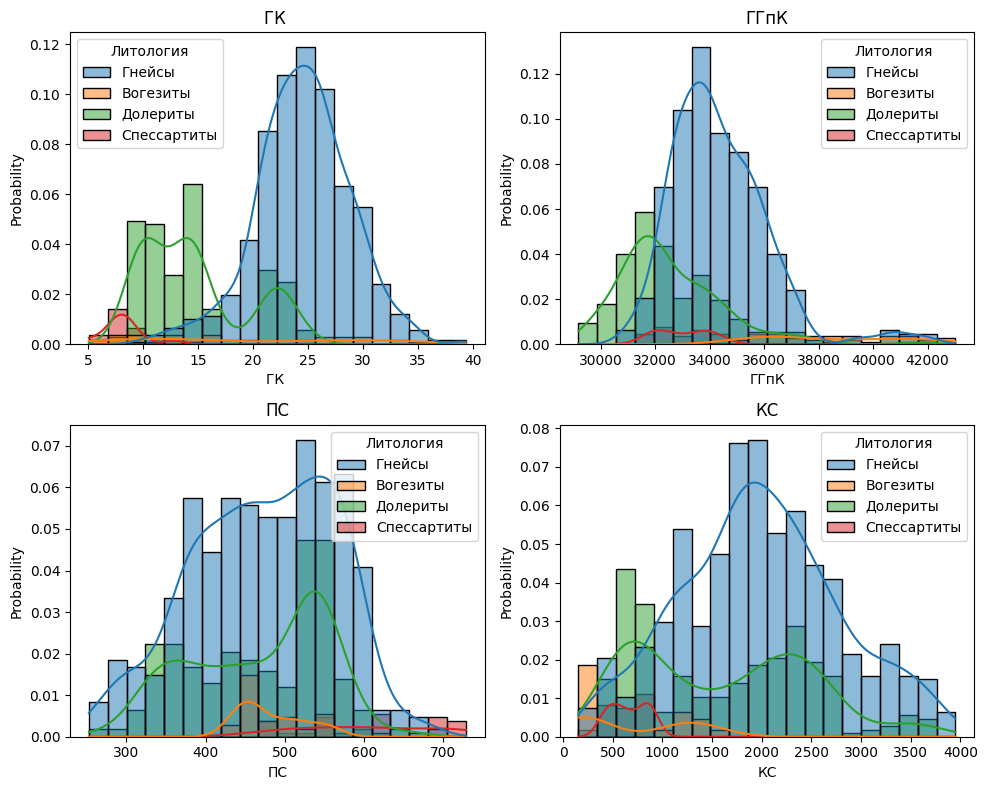

In [18]:
# Assuming 'data' is your DataFrame and it's already defined

fig = plt.figure(figsize=(10, 8))

parameters_list = [ 'ГК ', 'ГГпК', 'ПС', 'КС']

# Calculate appropriate subplot grid size
rows = 2
cols = (len(parameters_list) + 1) // rows

for index, param in enumerate(parameters_list):
    ax = plt.subplot(rows, cols, index + 1)
    sns.histplot(data=result_new, x=param, hue='Литология', stat="probability", kde=True, bins=20)
    plt.title(f'{param}')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Display the plot

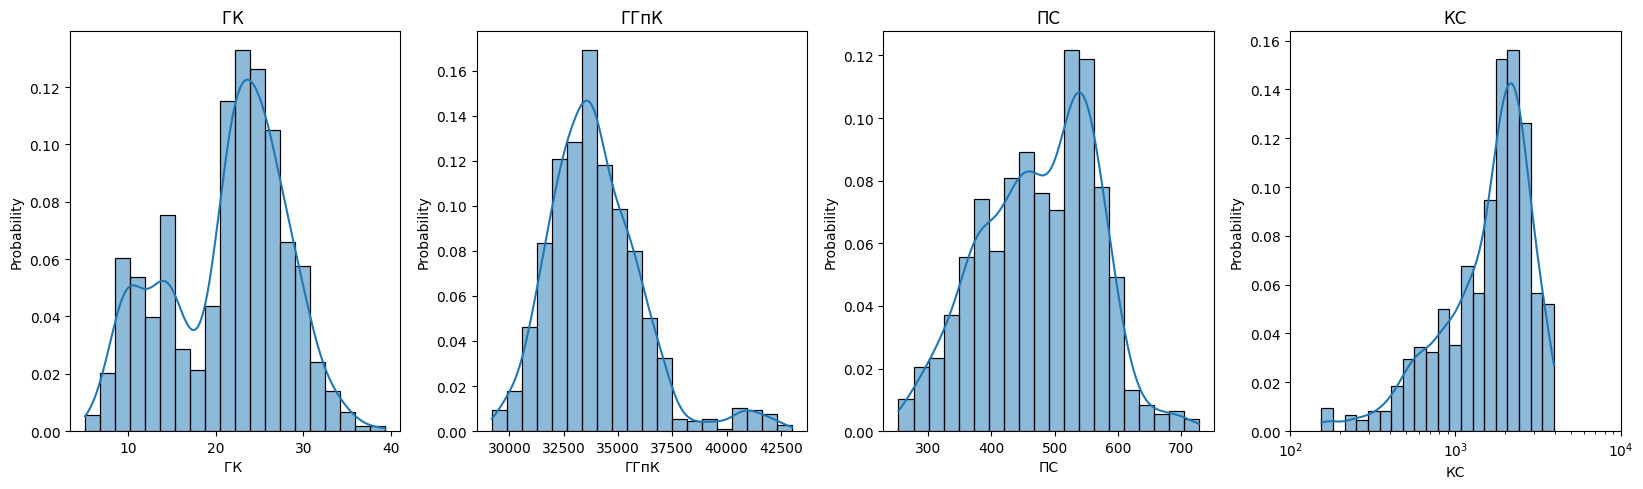

In [19]:
fig = plt.figure(figsize=(20, 5))


# Calculate appropriate subplot grid size
parameters_list = [col_name for col_name in well_logs.columns if 'Глубина' not in col_name]
rows = 1
cols = (len(parameters_list) + 1) // rows

for index, name_log in enumerate(well_logs_merged.columns):

   if name_log != "Глубина":

    ax = plt.subplot(rows, cols, index + 1)

    if name_log  == "КС":
      sns.histplot(data=well_logs_merged, x=name_log, stat="probability", kde=True, bins=20, log_scale=(True, False))
      plt.title(f'{name_log}')
      ax.set_xlim(100, 10000)
    else:
      sns.histplot(data=well_logs_merged, x=name_log, stat="probability", kde=True, bins=20)
      plt.title(f'{name_log}')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Display the plot

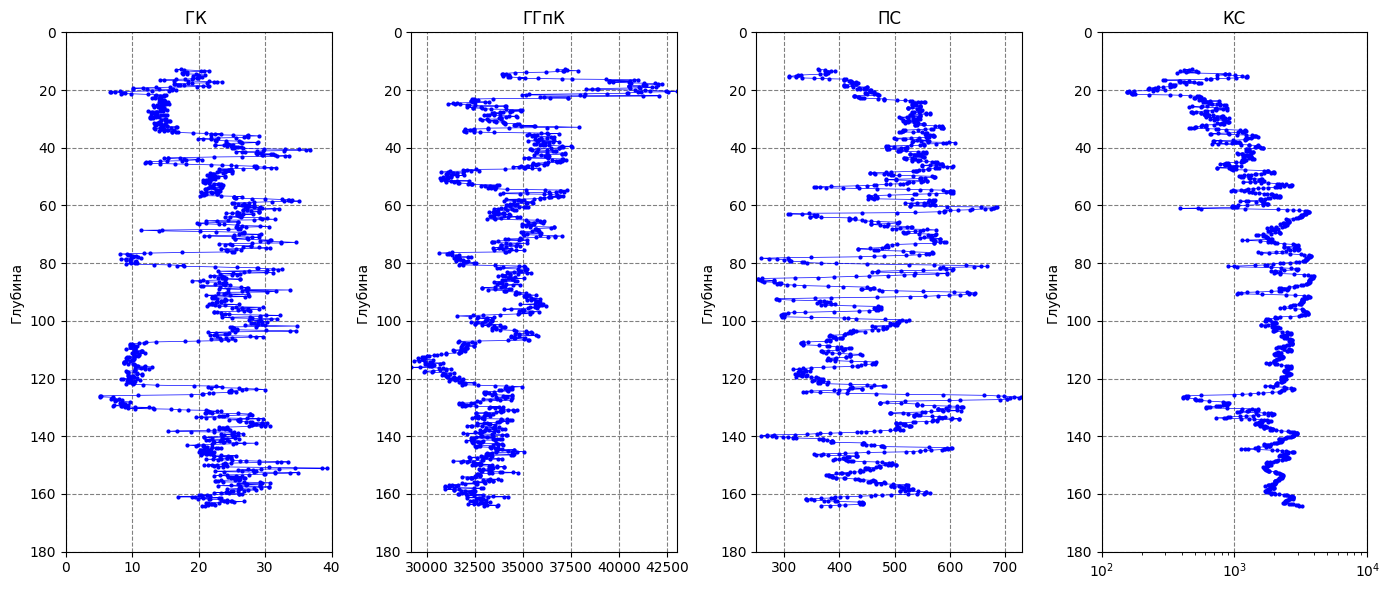

In [20]:
def initial_plot(ax, x, y, label_name):

    ax.plot(x, y, 'b-', marker='o',
            markersize=2,
            label=label_name, lw=0.5)
    ax.invert_yaxis()
    ax.set_title(f'{label_name}')
    ax.set_xlim((min(x) // 10) * 10, (np.round(max(x), -1) // 10) * 10)

    if x.name == "КС":
        ax.set_xscale('log')
        ax.set_xlim(100, 10000)

parameters_list = [col_name for col_name in well_logs.columns if 'Глубина' not in col_name]
rows = 1
cols = (len(parameters_list)) // rows
fig, axs = plt.subplots(rows, cols, figsize=(14, 6))

for index, name_log in enumerate(well_logs_merged.columns):
    if name_log != "Глубина":
        ax = axs[index-1]
        ax.set_ylabel(f"Глубина")
        ax.set_ylim(0, 180)
        ax.grid(color='gray', linestyle='--')
        initial_plot(ax, well_logs_merged[name_log], well_logs_merged['Глубина'], name_log)

plt.tight_layout()
plt.show()

In [21]:
unique_lithology_types = result_new['Литология'].unique()
print(unique_lithology_types)

['Гнейсы' 'Вогезиты' 'Долериты' 'Спессартиты']


In [22]:
lithology_numbers = {30000: {'lith':'Гнейсы', 'lith_num':1, 'hatch': '..', 'color':'#ffff00'},
                 65030: {'lith':'Вогезиты', 'lith_num':2, 'hatch':'||', 'color':'#ff8c00'},
                 65000: {'lith':'Долериты', 'lith_num':3, 'hatch':'--', 'color':'#bebebe'},
                 80000: {'lith':'Спессартиты', 'lith_num':4, 'hatch':'', 'color':'#7cfc00'}}

In [23]:
df_lith = pd.DataFrame.from_dict(lithology_numbers, orient='index')
df_lith.reset_index(inplace=True)
df_lith

index         lith  lith_num hatch    color
0  30000       Гнейсы         1    ..  #ffff00
1  65030     Вогезиты         2    ||  #ff8c00
2  65000     Долериты         3    --  #bebebe
3  80000  Спессартиты         4        #7cfc00

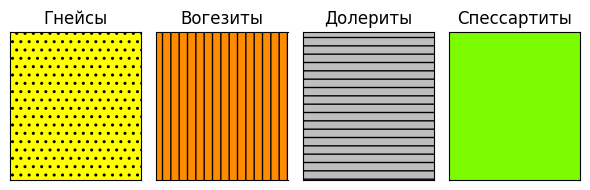

In [24]:
y = [0, 1]
x = [1, 1]

fig, axes = plt.subplots(ncols=4,nrows=1, sharex=True, sharey=True,
                         figsize=(6,2), subplot_kw={'xticks': [], 'yticks': []})

for ax, key in zip(axes.flat, lithology_numbers.keys()):
    ax.plot(x, y)
    ax.fill_betweenx(y, 0, 1, facecolor=lithology_numbers[key]['color'], hatch=lithology_numbers[key]['hatch'])
    ax.set_xlim(0, 0.1)
    ax.set_ylim(0, 1)
    ax.set_title(str(lithology_numbers[key]['lith']))

plt.tight_layout()

plt.show()

In [25]:
lithology_array = []
hatch_array = []
color_array = []

work_layers_initial = result_new

for row_index, row in enumerate(work_layers_initial.itertuples()):

    lithology = work_layers_initial.at[row.Index, 'Литология']
    # layers_name = work_layers_initial.at[row.Index, 'Event_name']
    # print(lithology)

    lit_num = df_lith.loc[df_lith['lith'] == str(lithology), 'index'].iloc[0]
    lithology_array.append(lit_num)


    hatch_val = df_lith.loc[df_lith['lith'] == str(lithology), 'hatch'].iloc[0]
    hatch_array.append(hatch_val)

    color_val = df_lith.loc[df_lith['lith'] == str(lithology), 'color'].iloc[0]
    color_array.append(color_val)

work_layers_initial["Lithology"] = lithology_array
work_layers_initial["Index"] = hatch_array
work_layers_initial["Color"] = color_array
work_layers_initial # для построения графиков с литологией

Глубина Литология    ГК       ГГпК      ПС       КС  Lithology Index  \
0        12.8    Гнейсы  17.27     37180  360.66   474.61      30000    ..   
1        12.9    Гнейсы  16.55  37313.33  362.58    416.4      30000    ..   
2        13.0    Гнейсы  17.76     36765  373.74   452.74      30000    ..   
3        13.3    Гнейсы  20.77  37886.67  373.62   511.12      30000    ..   
4        13.4    Гнейсы  21.58  37173.33  384.41    443.1      30000    ..   
...       ...       ...    ...       ...     ...      ...        ...   ...   
1072    163.6    Гнейсы  22.32     32135  441.33  2747.14      30000    ..   
1073    163.8    Гнейсы   22.5     33155  409.83  2904.53      30000    ..   
1074    163.9    Гнейсы  21.41     33695  399.94  2989.96      30000    ..   
1075    164.0    Гнейсы  20.49  33653.33  382.84  3060.61      30000    ..   
1076    164.1    Гнейсы   20.9  32993.33  367.54  3224.52      30000    ..   

        Color  
0     #ffff00  
1     #ffff00  
2     #ffff00  
3     #ffff00  
4     #ffff00  
...       ...  
1072  #ffff00  
1073  #ffff00  
1074  #ffff00  
1075  #ffff00  
1076  #ffff00  

[1077 rows x 9 columns]

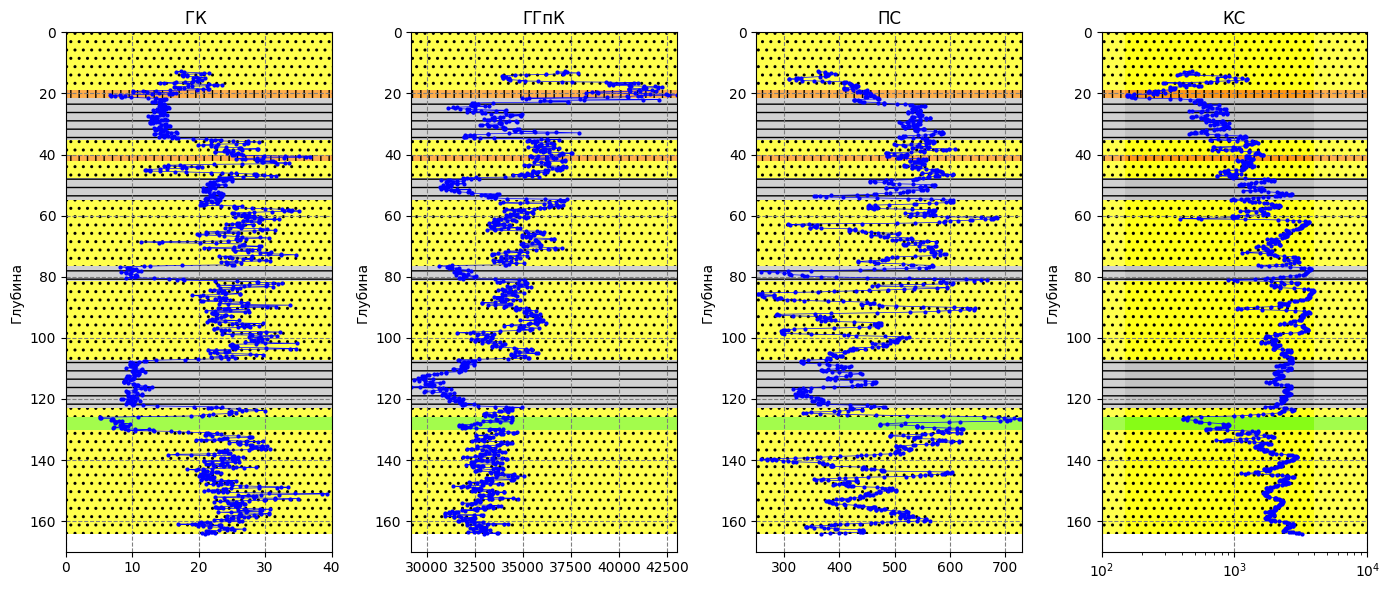

In [28]:
# Update the initial_plot function to handle the case where the key is not found in the dictionary
def initial_plot(ax, x, y, label_name, lithology_data):
    lithology_data.index = range(1, len(lithology_data) + 1)
    ax.plot(x, y, 'b-', marker='o', markersize=2, label=label_name, lw=0.5)
    ax.invert_yaxis()
    ax.set_title(f'{label_name}')
    ax.set_xlim((min(x) // 10) * 10, (np.round(max(x), -1) // 10) * 10)

    depth_start = 0
    for lit, depth in zip(work_layers_initial.index,work_layers_initial['Глубина']):

      key = int(lit)
      color = work_layers_initial.at[lit, 'Color']
      hatch = work_layers_initial.at[lit, 'Index']


      depth_values = [depth_start, depth]
      depth_start = depth

      ax.fill_betweenx(depth_values,
                       (min(x) // 10) * 10, (np.round(max(x), -1) // 10) * 10,
                       facecolor=color, hatch=hatch, alpha=0.7)

      if x.name == "КС":
        ax.fill_betweenx(depth_values, 100, 10000,
                       facecolor=color, hatch=hatch, alpha=0.7)



    if x.name == "КС":
        ax.set_xscale('log')
        ax.set_xlim(100, 10000)


# Assuming well_logs_merged contains lithology data
# Assuming result_new['Литология'] contains lithology type data

parameters_list = [col_name for col_name in well_logs.columns if 'Глубина' not in col_name]
rows = 1
cols = (len(parameters_list)) // rows
fig, axs = plt.subplots(rows, cols, figsize=(14, 6))

for index, name_log in enumerate(well_logs_merged.columns):
    if name_log != "Глубина":
        ax = axs[index-1]
        ax.set_ylabel(f"Глубина")
        ax.set_ylim(0, 170)
        ax.grid(color='gray', linestyle='--')
        initial_plot(ax, well_logs_merged[name_log], well_logs_merged['Глубина'], name_log, result_new['Литология'])

plt.tight_layout()
plt.show()

### добавление НТПК К ГИС

In [83]:
# thermal_logs = data[['Sample ID', 'Top Depth', 'TC initial', 'Offset', 'Depth_TC']]
path_to_ser = Path('/content/R/Data/Rosatom_dataset.xlsx')
data_initial = pd.read_excel(path_to_ser, sheet_name='Well logging', skiprows=0)
data = data_initial.copy()

thermal_logs = data[['Sample ID', 'Top Depth', 'TC initial', 'Offset', 'Depth_TC']]
thermal_logs = thermal_logs.drop(0)
thermal_logs.drop(['Top Depth', 'Offset'], axis=1, inplace=True)

# # отфильтровать значения, которые не совпадают с ГИС
lower_bound, upper_bound, step = 0, 180, 0.1
thermal_logs = filter_numeric_range(thermal_logs[['Depth_TC', 'TC initial']], 'Depth_TC', lower_bound, upper_bound, step)

In [84]:
thermal_logs

Depth_TC TC initial  Глубина
0        30.525      2.555   30.525
1        30.526      2.556   30.526
2        30.527       2.52   30.527
3        30.528      2.541   30.528
4        30.529      2.566   30.529
...         ...        ...      ...
97762   164.974      3.023  164.974
97763   164.975      3.151  164.975
97764   164.976      3.183  164.976
97765   164.977      2.959  164.977
97766   164.978      3.152  164.978

[97767 rows x 3 columns]

In [85]:
# make pf dataframe to merge with well-logging
df = pd.DataFrame(thermal_logs)

# Rounding the 'Глубина' column to one decimal place
df['Глубина'] = df['Глубина'].round(1)

# Group by 'Глубина' and calculate the mean of 'TC initial'
thermal_logs_scaled = df.groupby('Глубина')['TC initial'].agg('mean').reset_index()

thermal_logs_scaled
# thermal_logs_scaled .isnull().sum()

Глубина TC initial
0        30.5    2.55904
1        30.6   2.917139
2        30.7   2.822351
3        36.3   2.851311
4        36.4   2.901524
...       ...        ...
1186    164.6   2.738732
1187    164.7   2.639718
1188    164.8   2.943521
1189    164.9   2.802152
1190    165.0   2.731276

[1191 rows x 2 columns]

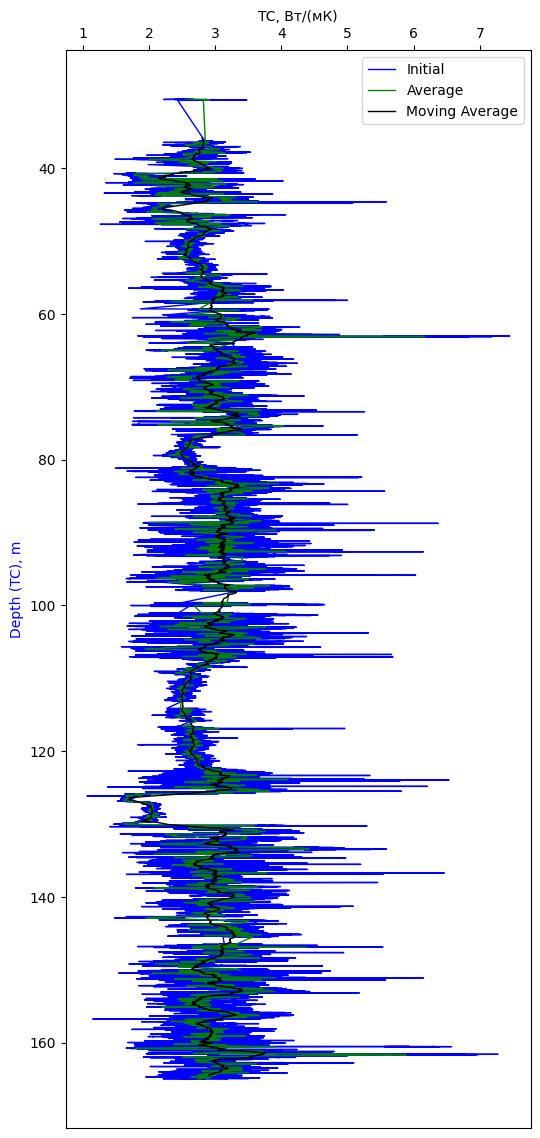

In [88]:
# averagiing in the moving window
thermal_logs['TC avg'] = thermal_logs['TC initial'].rolling(window=1000).mean()
thermal_logs['Depth TC avg'] = thermal_logs["Depth_TC"].rolling(window=1000).mean()

# thermal_logs_unique = thermal_logs.drop_duplicates(subset=['Depth TC avg'])
# thermal_logs_unique

fig, ax1 = plt.subplots(figsize=(6, 14))

# Data for the first plot
x, y = thermal_logs['TC initial'], thermal_logs["Depth_TC"]
ax1.plot(x, y, 'b-', label='Initial', lw=1)

x, y = thermal_logs_scaled ['TC initial'], thermal_logs_scaled ['Глубина'] # averaging without moving
ax1.plot(x, y, 'g-', label='Average', lw=1)

x, y = thermal_logs['TC avg'], thermal_logs['Depth TC avg']
ax1.plot(x, y, 'k-', label='Moving Average', lw=1)

ax1.set_ylabel('Depth (TC), m', color='b')

ax1.invert_yaxis()  # Invert the y-axis for the first plot
ax1.xaxis.tick_top()  # Move the x-axis to the top
ax1.xaxis.set_label_position('top')  # Label for the x-axis on top
ax1.set_xlabel('TC, Вт/(мК)')
ax1.legend()

plt.show()

In [113]:
# объединение данных ГИС и НТПК с единой привязкой по глубине (для обучения)

# Filter and convert columns using the function
lower_bound, upper_bound, step = 36.3, 164.1, 0.1
filtered_df_1 = filter_numeric_range(work_layers_initial[['Глубина', 'ГК ', 'ГГпК', 'ПС', 'КС','Литология', 'Lithology', 'Index',
       'Color']], 'Глубина', lower_bound, upper_bound, step)

filtered_df_2 = filter_numeric_range(thermal_logs_scaled [['Глубина', 'TC initial']], 'Глубина', lower_bound, upper_bound, step)


result = pd.merge(filtered_df_1, filtered_df_2, on="Глубина", how='inner')  # Merge filtered_df_1 and filtered_df_4
result.rename(columns={'TC initial': 'НТПК'}, inplace=True)

data_set = result[['Глубина', 'ГК ', 'ГГпК', 'ПС', 'КС', 'Литология', 'НТПК', 'Lithology', 'Index',
       'Color']]
data_set

Глубина    ГК       ГГпК      ПС       КС Литология      НТПК  Lithology  \
0       36.4  26.85     36620  556.32  1361.23    Гнейсы  2.901524      30000   
1       36.5  25.56     36580  543.86  1323.58    Гнейсы  2.679558      30000   
2       36.6  22.85  36253.33  528.91  1273.27    Гнейсы   2.89797      30000   
3       36.7   21.9  35973.33  498.00  1219.27    Гнейсы  2.699128      30000   
4       36.9  19.97  35933.33  502.13  1215.51    Гнейсы  2.608202      30000   
..       ...    ...       ...     ...      ...       ...       ...        ...   
824    163.6  22.32     32135  441.33  2747.14    Гнейсы  3.297085      30000   
825    163.8   22.5     33155  409.83  2904.53    Гнейсы  3.409836      30000   
826    163.9  21.41     33695  399.94  2989.96    Гнейсы   2.80076      30000   
827    164.0  20.49  33653.33  382.84  3060.61    Гнейсы  2.828663      30000   
828    164.1   20.9  32993.33  367.54  3224.52    Гнейсы  3.504393      30000   

    Index    Color  
0      ..  #ffff00  
1      ..  #ffff00  
2      ..  #ffff00  
3      ..  #ffff00  
4      ..  #ffff00  
..    ...      ...  
824    ..  #ffff00  
825    ..  #ffff00  
826    ..  #ffff00  
827    ..  #ffff00  
828    ..  #ffff00  

[829 rows x 10 columns]

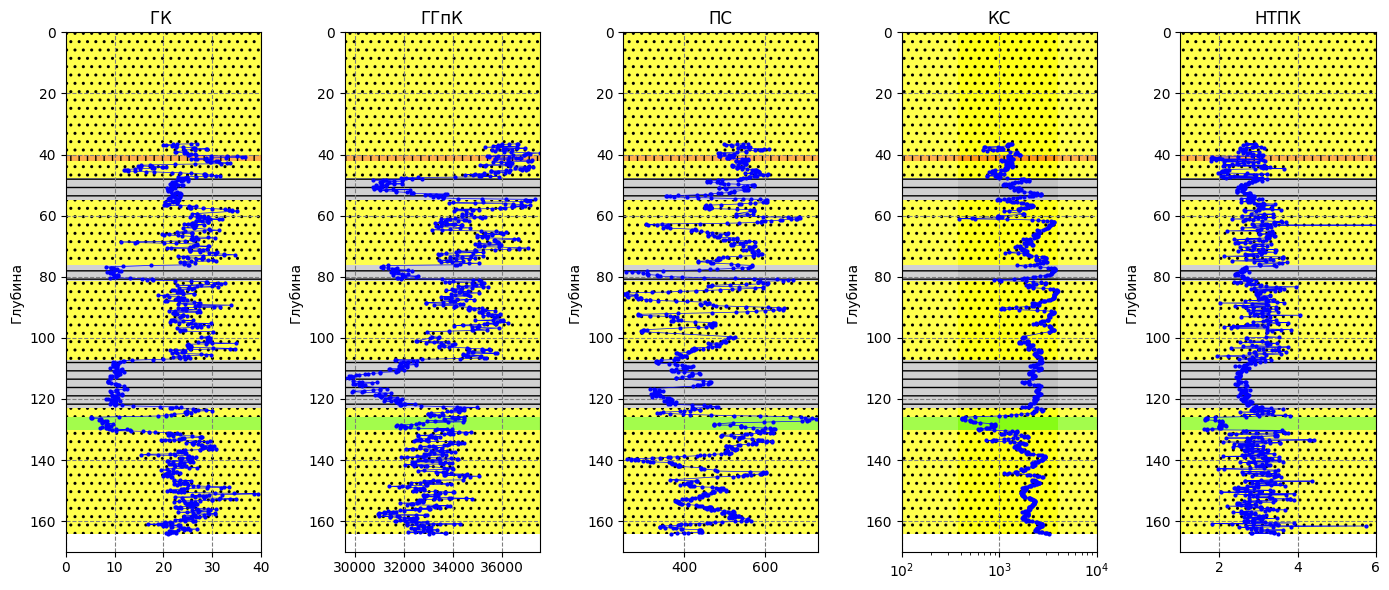

In [114]:
# Assuming data is a pandas DataFrame and result_new is defined
data = data_set

def initial_plot(ax, x, y, label_name, lithology_data):
    lithology_data.index = range(1, len(lithology_data) + 1)
    ax.plot(x, y, 'b-', marker='o', markersize=2, label=label_name, lw=0.5)
    ax.invert_yaxis()
    ax.set_title(f'{label_name}')
    ax.set_xlim((min(x) // 10) * 10, (np.round(max(x), -1) // 10) * 10)

    depth_start = 0
    for lit, depth in zip(data.index, data['Глубина']):
        key = int(lit)
        color = data.at[lit, 'Color']
        hatch = data.at[lit, 'Index']

        depth_values = [depth_start, depth]
        depth_start = depth

        ax.fill_betweenx(depth_values,
                         (min(x) // 10) * 10, (np.round(max(x), -1) // 10) * 10,
                         facecolor=color, hatch=hatch, alpha=0.7)

        if x.name == "КС":
            ax.fill_betweenx(depth_values, 100, 10000,
                             facecolor=color, hatch=hatch, alpha=0.7)

    if x.name == "КС":
        ax.set_xscale('log')
        ax.set_xlim(100, 10000)

    if x.name == "НТПК":
        ax.set_xlim(1, 6)

parameters_list = [col_name for col_name in data.keys() if 'Глубина' not in col_name
                   and 'Литология' not in col_name
                   and 'Lithology' not in col_name
                   and 'Index' not in col_name
                   and 'Color' not in col_name]

rows = 1
cols = len(parameters_list)
fig, axs = plt.subplots(rows, cols, figsize=(14, 6))

if cols == 1:
    axs = [axs]  # Make axs iterable if there is only one subplot

for index, name_log in enumerate(parameters_list):
    ax = axs[index]
    ax.set_ylabel("Глубина")
    ax.set_ylim(0, 170)
    ax.grid(color='gray', linestyle='--')
    initial_plot(ax, data[name_log], data['Глубина'], name_log, result_new['Литология'])

plt.tight_layout()
plt.show()

## Data set preparation fot training

In [115]:
data_set.columns

Index(['Глубина', 'ГК ', 'ГГпК', 'ПС', 'КС', 'Литология', 'НТПК', 'Lithology',
       'Index', 'Color'],
      dtype='object')

In [116]:
data_set

Глубина    ГК       ГГпК      ПС       КС Литология      НТПК  Lithology  \
0       36.4  26.85     36620  556.32  1361.23    Гнейсы  2.901524      30000   
1       36.5  25.56     36580  543.86  1323.58    Гнейсы  2.679558      30000   
2       36.6  22.85  36253.33  528.91  1273.27    Гнейсы   2.89797      30000   
3       36.7   21.9  35973.33  498.00  1219.27    Гнейсы  2.699128      30000   
4       36.9  19.97  35933.33  502.13  1215.51    Гнейсы  2.608202      30000   
..       ...    ...       ...     ...      ...       ...       ...        ...   
824    163.6  22.32     32135  441.33  2747.14    Гнейсы  3.297085      30000   
825    163.8   22.5     33155  409.83  2904.53    Гнейсы  3.409836      30000   
826    163.9  21.41     33695  399.94  2989.96    Гнейсы   2.80076      30000   
827    164.0  20.49  33653.33  382.84  3060.61    Гнейсы  2.828663      30000   
828    164.1   20.9  32993.33  367.54  3224.52    Гнейсы  3.504393      30000   

    Index    Color  
0      ..  #ffff00  
1      ..  #ffff00  
2      ..  #ffff00  
3      ..  #ffff00  
4      ..  #ffff00  
..    ...      ...  
824    ..  #ffff00  
825    ..  #ffff00  
826    ..  #ffff00  
827    ..  #ffff00  
828    ..  #ffff00  

[829 rows x 10 columns]

In [184]:
dataset = data_set[['ГК ', 'ГГпК', 'ПС', 'КС', 'Литология', 'НТПК']]
X = data_set[['ГК ', 'ГГпК', 'ПС', 'КС', 'Литология']]
y = data_set['НТПК']
n = len(X)

Label encoding and normalization

In [185]:
from sklearn.preprocessing import LabelEncoder

In [186]:
categorical_clmn = X.select_dtypes(include='object').columns
# Apply Label Encoding to each categorical column
for col in categorical_clmn:
    X[col] = LabelEncoder().fit_transform(X[col])

<Axes: >

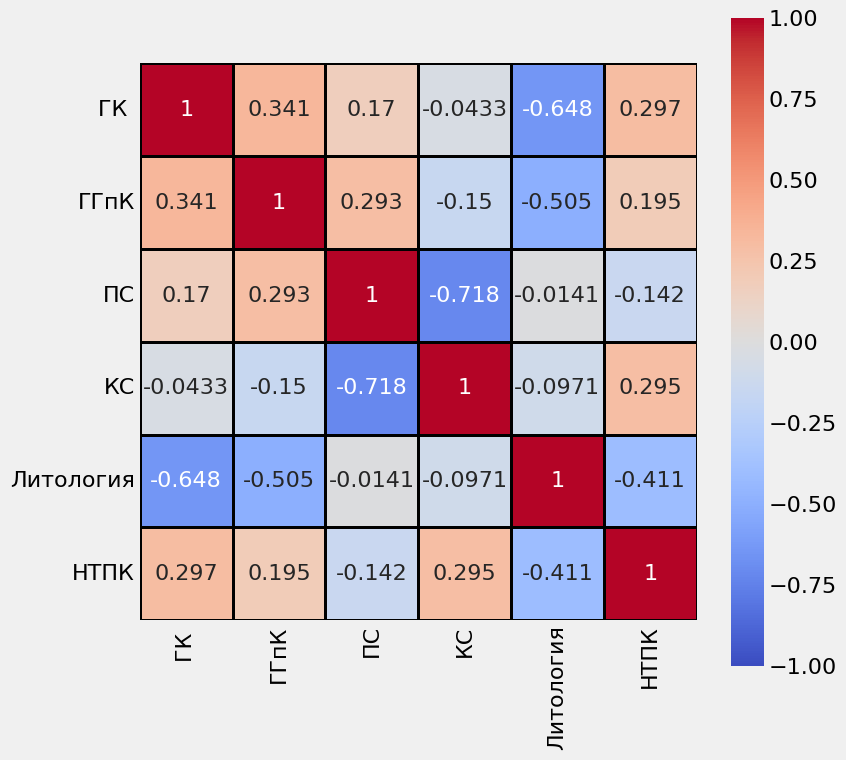

In [187]:
fig, ax = plt.subplots(figsize=(8,8))

categorical_clmn = dataset.select_dtypes(include='object').columns
# Apply Label Encoding to each categorical column
for col in categorical_clmn:
    dataset[col] = LabelEncoder().fit_transform(dataset[col])

sns.heatmap(dataset.corr(),fmt = '.3g', square=True, annot = True,
            vmin=-1, vmax=1, center= 0, cmap= 'coolwarm',
            linewidths=1, linecolor='black')

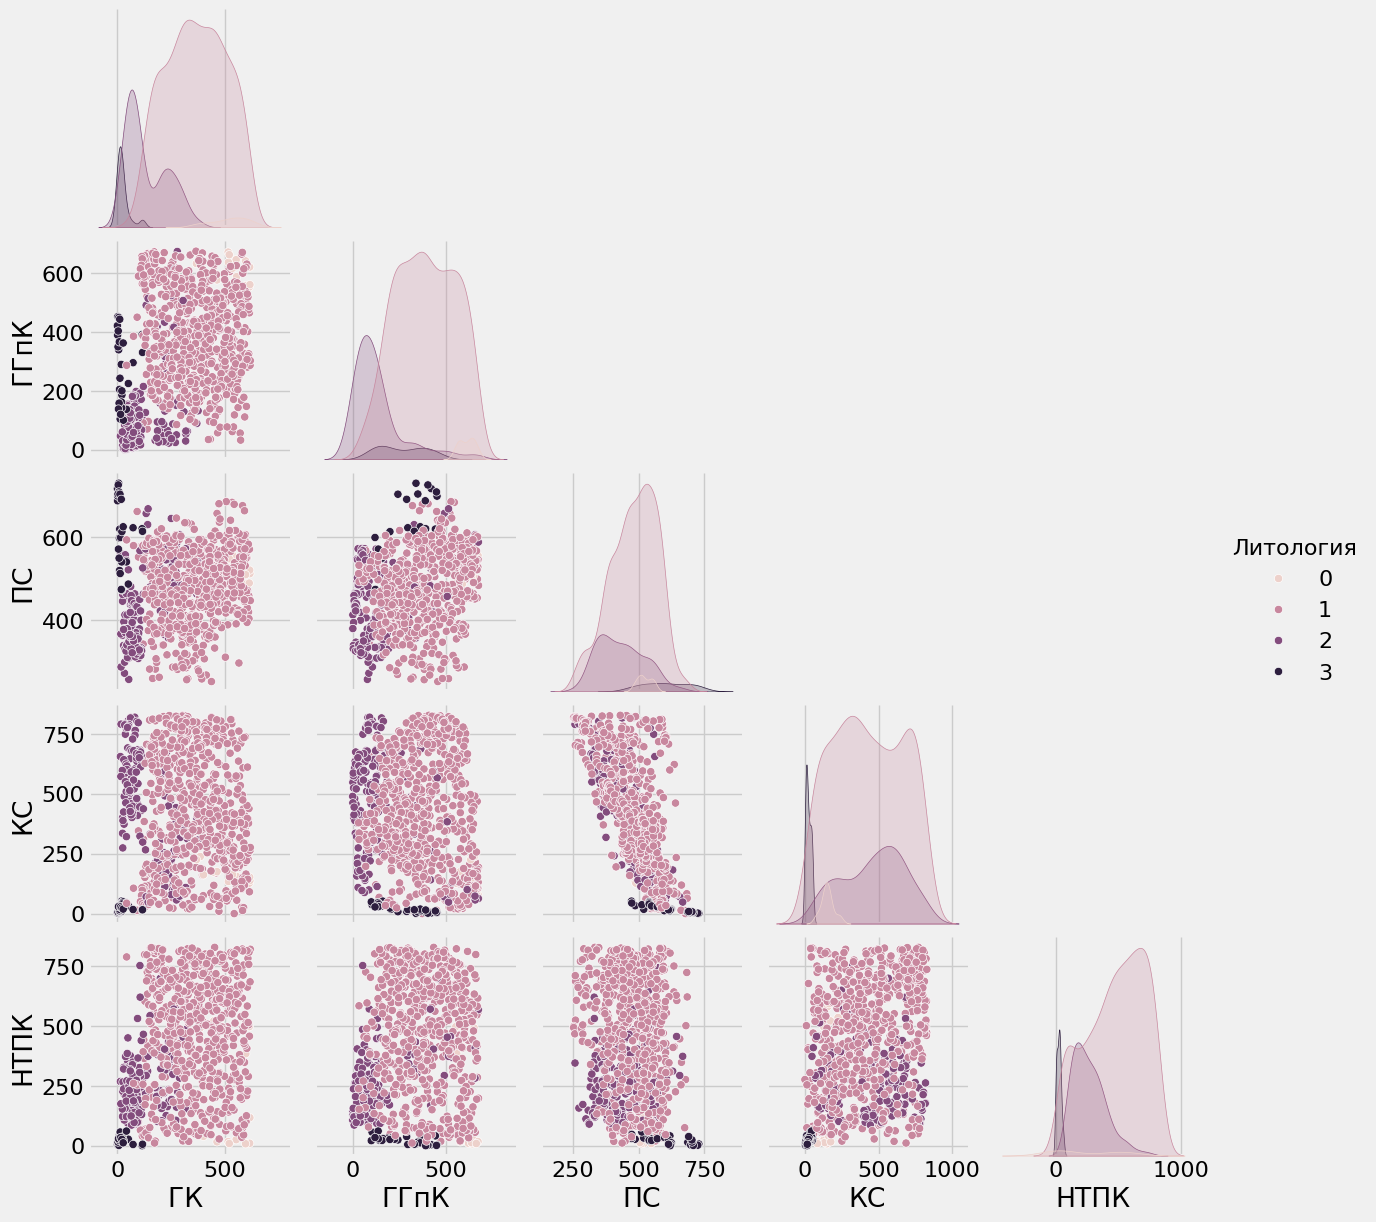

In [178]:
sns.pairplot(data=dataset,hue='Литология', corner=True)

In [179]:
dataset.dtypes

ГК             int64
ГГпК           int64
ПС           float64
КС             int64
Литология      int64
НТПК           int64
dtype: object

In [183]:
X.columns

Index(['ГК ', 'ГГпК', 'ПС', 'КС'], dtype='object')

In [189]:
from sklearn.preprocessing import MinMaxScaler
# import pandas as pd

# Assuming X is your DataFrame

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Select numerical columns (float64 and int64 types)
numerical_columns = ['ГК ', 'ГГпК', 'ПС', 'КС']

# Apply scaling to all numerical columns
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

# Print the DataFrame to verify the changes
print(X)

          ГК       ГГпК        ПС        КС  Литология
0    0.743134  0.948225  0.638112  0.205562          1
1    0.639742  0.945266  0.611925  0.194680          1
2    0.439418  0.917160  0.580505  0.175333          1
3    0.361874  0.893491  0.515542  0.152358          1
4    0.258481  0.887574  0.524222  0.149940          1
..        ...       ...       ...       ...        ...
824  0.397415  0.226331  0.396440  0.846433          1
825  0.413570  0.406805  0.330237  0.875453          1
826  0.327948  0.520710  0.309451  0.889964          1
827  0.276252  0.511834  0.273513  0.897219          1
828  0.297254  0.377219  0.241357  0.912938          1

[829 rows x 5 columns]


In [196]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=int(n*0.15), random_state=0xC0FFEE)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=int(n*0.6), random_state=0xC0FFEE)

In [197]:
X_train

ГК       ГГпК        ПС        КС  Литология
552  0.029079  0.428994  0.918917  0.010883          3
71   0.214863  0.871302  0.697673  0.037485          1
148  0.371567  0.584320  0.734159  0.256348          1
372  0.528271  0.823964  0.080873  0.916566          1
507  0.142165  0.105030  0.228852  0.713422          2
..        ...       ...       ...       ...        ...
776  0.927302  0.047337  0.544398  0.458283          1
705  0.854604  0.107988  0.361047  0.499395          1
714  0.327948  0.337278  0.525819  0.395405          1
704  0.760905  0.192308  0.352157  0.517533          1
364  0.403877  0.785503  0.682289  0.937122          1

[208 rows x 5 columns]

In [198]:
X.shape, X_test.shape

((829, 5), (124, 5))

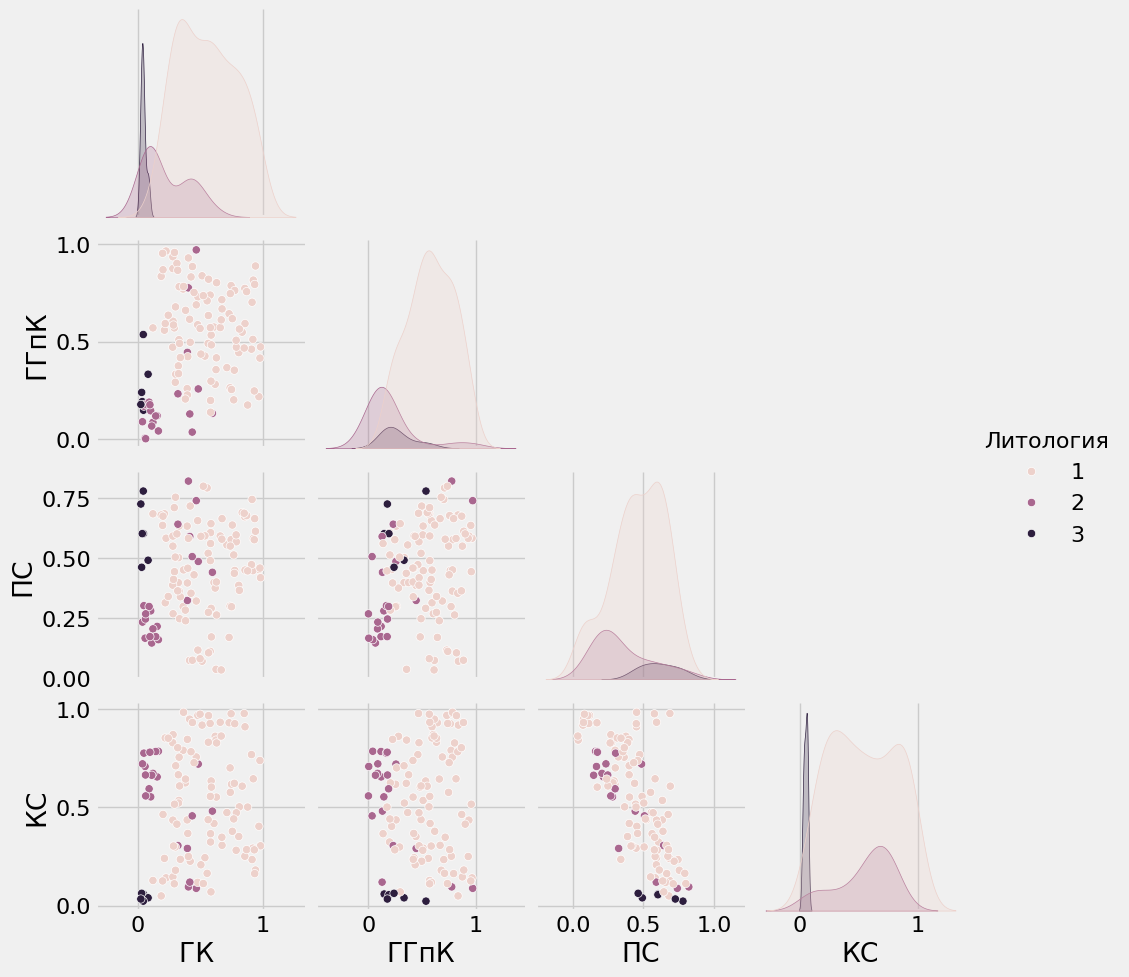

In [199]:
sns.pairplot(data=X_test, hue='Литология', corner=True)

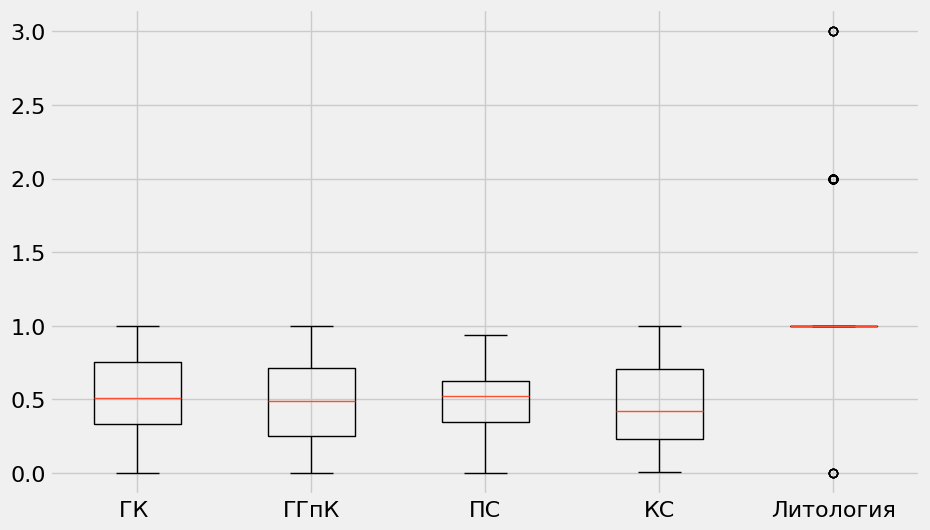

RandomForestRegressor:
Train mse: 0.05
Train R^2: 0.74
Validation: 0.15
Validation R^2: -0.91
Test: 0.21
Test  R^2: -1.59
{'max_features': 1, 'min_samples_split': 6, 'n_estimators': 10} 

ExtraTreesRegressor:
Train mse: 0.05
Train R^2: 0.77
Validation: 0.14
Validation R^2: -0.39
Test: 0.22
Test  R^2: -1.27
{'max_features': 4, 'min_samples_split': 8, 'n_estimators': 10} 

XGBRegressor:
Train mse: 0.06
Train R^2: 0.72
Validation: 0.15
Validation R^2: -0.73
Test: 0.23
Test  R^2: -1.57
{'learning_rate': 0.25375, 'max_depth': 4, 'n_estimators': 14} 

LinearRegression:
Train mse: 0.17
Train R^2: 0.17
Validation: 0.15
Validation R^2: -2.77
Test: 0.21
Test  R^2: -3.77
{} 

Ridge:
Train mse: 0.17
Train R^2: 0.17
Validation: 0.15
Validation R^2: -3.06
Test: 0.21
Test  R^2: -4.2
{} 

KNeighborsRegressor:
Train mse: 0.11
Train R^2: 0.46
Validation: 0.15
Validation R^2: -0.46
Test: 0.21
Test  R^2: -1.16
{} 

DecisionTreeRegressor:
Train mse: 0.0
Train R^2: 1.0
Validation: 0.34
Validation R^2: -0.18

In [200]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import xgboost as xgb
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor



RMSE_validation, RMSE_test = [], []
R2_validation, R2_test = [], []
model_name = []

plt.figure(figsize=(10, 6))

# Assuming X_train is defined and is a DataFrame
data = [X_train[i] for i in X_train.columns]

plt.boxplot(data, labels=X_train.columns)
plt.show()

models_list = [
    RandomForestRegressor(random_state=0xC0FFEE),
    ExtraTreesRegressor(random_state=0xC0FFEE),
    xgb.XGBRegressor(random_state=0xC0FFEE),
    LinearRegression(),
    Ridge(),
    KNeighborsRegressor(),
    DecisionTreeRegressor()
]

# names = ['Linear Regression', 'Ridge Regression', 'Lasso Regression',
#          'K Neighbors Regressor', 'Decision Tree Regressor',
#          'Random Forest Regressor', 'Gradient Boosting Regressor',
#          'Adaboost Regressor']
# models = [LinearRegression(), Ridge(), Lasso(),
#           KNeighborsRegressor(), DecisionTreeRegressor(),
#           RandomForestRegressor(), GradientBoostingRegressor(),
#           AdaBoostRegressor()]

# Ensure that the range for max_features is valid
min_features = min(1, X_train.shape[1])
max_features = max(1, X_train.shape[1])

p_g1 = {
    'max_features': np.arange(min_features, max_features + 1),
    'n_estimators': np.linspace(2, 10, 4, dtype=int),
    'min_samples_split': np.arange(2, 10, 2),
}

p_g2 = {
    'max_features': np.arange(min_features, max_features + 1),
    'n_estimators': np.linspace(2, 10, 4, dtype=int),
    'min_samples_split': np.arange(2, 10, 2),
}

p_g3 = {
    "max_depth": np.arange(min_features, max_features + 1),
    'n_estimators': np.linspace(2, 40, 4, dtype=int),
    "learning_rate": np.linspace(0.005, 1 , 5),
}

p_g4 = {
}



params_list = [p_g1, p_g2, p_g3, p_g4, p_g4, p_g4, p_g4]

for reg, grid in zip(models_list, params_list):

    model_name.append(type(reg).__name__)

  # search for the optimal hyperparameters
    gs = GridSearchCV(reg, param_grid=grid, n_jobs=-1)
    gs.fit(X_val, y_val)
    best_reg = reg.__class__(**gs.best_params_)
    print(f'{type(reg).__name__}:')


  # use these values for our hyperparameters in the final calculation
    best_reg.fit(X_train, y_train)
    y_pred = best_reg.predict(X_train)
    print('Train mse:', mean_squared_error(y_pred, y_train).round(2))
    print('Train R^2:', r2_score(y_train, y_pred).round(2))

    y_pred = best_reg.predict(X_val)
    print('Validation:', mean_squared_error(y_pred, y_val).round(2))
    print('Validation R^2:', r2_score(y_pred, y_val).round(2))
    RMSE_validation.append(mean_squared_error(y_pred, y_val).round(2))
    R2_validation.append(r2_score(y_pred, y_val).round(2))

    y_pred = best_reg.predict(X_test)
    print('Test:', mean_squared_error(y_pred, y_test).round(2))
    print('Test  R^2:', r2_score(y_pred, y_test).round(2))
    RMSE_test.append(mean_squared_error(y_pred,y_test).round(2))
    R2_test.append(r2_score(y_pred,y_test).round(2))
    print(gs.best_params_, '\n')

In [201]:
evaluation = pd.DataFrame({'Model': model_name,
                           'RMSE val': RMSE_validation,
                           'R2 val': R2_validation,
                           'RMSE test': RMSE_test,
                           'R2 test': R2_test})
print("FOLLOWING ARE THE TRAINING SCORES: ")
evaluation

FOLLOWING ARE THE TRAINING SCORES: 


Model  RMSE val  R2 val  RMSE test  R2 test
0  RandomForestRegressor      0.15   -0.91       0.21    -1.59
1    ExtraTreesRegressor      0.14   -0.39       0.22    -1.27
2           XGBRegressor      0.15   -0.73       0.23    -1.57
3       LinearRegression      0.15   -2.77       0.21    -3.77
4                  Ridge      0.15   -3.06       0.21    -4.20
5    KNeighborsRegressor      0.15   -0.46       0.21    -1.16
6  DecisionTreeRegressor      0.34   -0.18       0.34    -0.58

Train R^2: 0.27


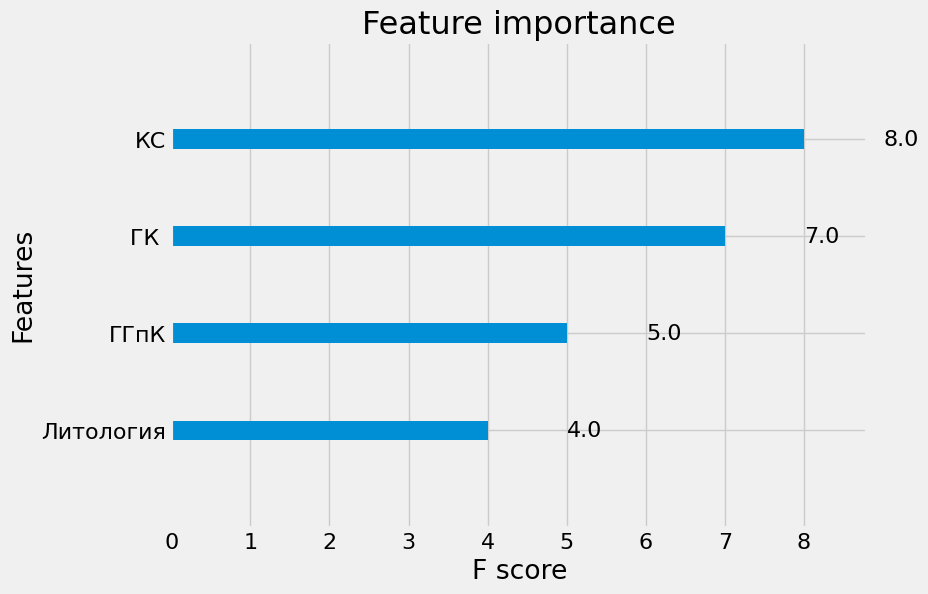

(1.5, 4.0)

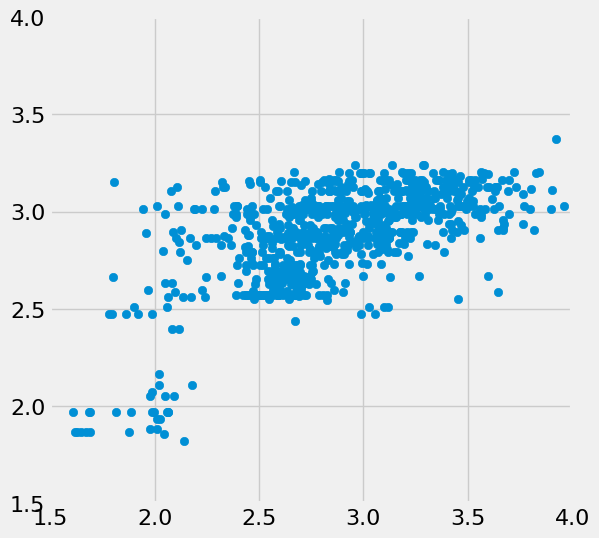

In [202]:
best_xgb_regressor=xgb.XGBRegressor(
                          learning_rate = 0.5025,
                          n_estimators  = 27,
                          max_depth     = 1,
                          eval_metric='rmse')

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.12)
best_xgb_regressor.fit(X_train, y_train)
predictions = best_xgb_regressor.predict(X_test)
print('Train R^2:', r2_score(y_test, predictions).round(2))


# the feature importance for xgb!
from xgboost import plot_importance
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
plt.rcParams.update({'font.size': 16})

fig, ax = plt.subplots(figsize=(8,6))
plot_importance(best_xgb_regressor, max_num_features=4, ax=ax)
plt.show();


# prediction for the whole dataset
y_pred = best_xgb_regressor.predict(X)

fig, ax = plt.subplots(figsize=(6,6))
plt.scatter(y, y_pred)
plt.xlim(1.5, 4)
plt.ylim(1.5, 4)

### Merge data

In [ ]:
merged_data = pd.merge(
    data[['TC, Вт/(мК)', 'Depth (TC), m']],
    data[['ГК, мкР/час', 'Глубина (ГК),м']],
    left_on='Depth (TC), m',
    right_on='Глубина (ГК),м',
    how='inner'
)

In [ ]:
merged_data = merged_data.dropna(subset=['TC, Вт/(мК)'])
merged_data.drop(columns=['Глубина (ГК),м'], inplace=True)

In [ ]:
merged_data = pd.merge(
    merged_data,
    data[['ГГК-п имп/мин', 'Глубина (ГГК-п), м']],
    left_on='Depth (TC), m',
    right_on='Глубина (ГГК-п), м',
    how='inner'
)

merged_data.drop(columns=['Глубина (ГГК-п), м'], inplace=True)


# Rename columns for clarity if necessary
merged_data.rename(columns={
    'TC, Вт/(мК)': 'TC Value',
    'ГК, мкР/час': 'ГК Value',
    'ГГК-п имп/мин': 'ГГК-п Value',
    'Depth (TC), m': 'Common Depth'
}, inplace=True)

merged_data

TC Value  Common Depth  ГК Value  ГГК-п Value
0    2.815388          37.1     21.82     35620.00
1    2.666176          38.2     28.83     36133.33
2    2.598122          38.6     24.24     35565.00
3    2.623626          38.7     24.42     35685.00
4    2.627114          39.2     22.39     36366.67
..        ...           ...       ...          ...
545  3.129074         163.3     21.05     32780.00
546  3.136196         163.7     22.99     32540.00
547  3.134156         163.8     22.50     33155.00
548  3.153052         163.9     21.41     33695.00
549  3.141634         164.0     20.49     33653.33

[550 rows x 4 columns]

### Lithology

In [ ]:
lithology = data[['Кровля', 'Подошва','Литология']].dropna()

In [ ]:
def lit_func(lithology, merged_data):

  corresponding_lit = pd.DataFrame(columns=['Common Depth', 'Lithology'])

  for index, row in merged_data.iterrows():
      common_depth = row['Common Depth']
      mask = (lithology['Кровля'] <= common_depth) & (lithology['Подошва'] >= common_depth)
      filtered_lithology = lithology[mask]
      # print(common_depth, filtered_lithology )

      # if not filtered_lithology.empty:

      for _, lit_row in filtered_lithology.iterrows():
          new_row = pd.DataFrame({
              'Common Depth': [common_depth],
              'Lithology': [lit_row['Литология']]
          })
          corresponding_lit = pd.concat([corresponding_lit, new_row], ignore_index=True)

  return corresponding_lit

In [ ]:
result_new = pd.merge(
    lit_func(lithology, merged_data),
    merged_data,
    left_on='Common Depth',
    right_on='Common Depth',
    how='inner'
)

In [ ]:
result_new.columns

Index(['Common Depth', 'Lithology', 'TC Value', 'ГК Value', 'ГГК-п Value'], dtype='object')

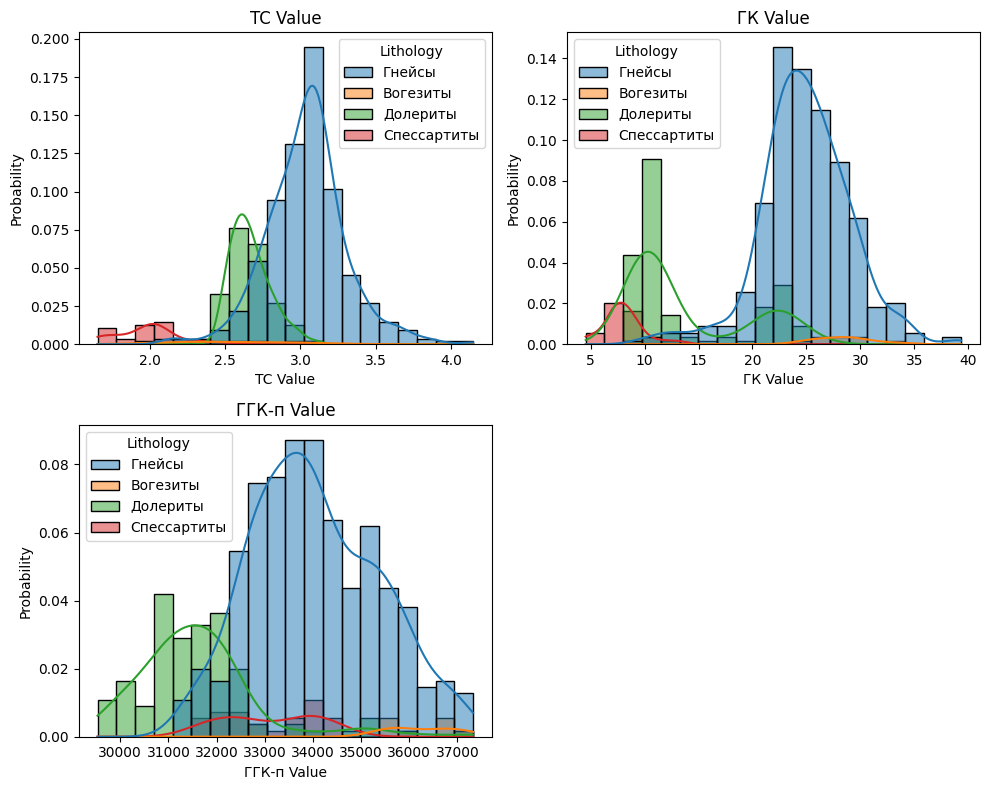

In [ ]:
# Assuming 'data' is your DataFrame and it's already defined

fig = plt.figure(figsize=(10, 8))

parameters_list = [ 'TC Value',
                   'ГК Value',
                   'ГГК-п Value'
]

# Calculate appropriate subplot grid size
rows = 2
cols = (len(parameters_list) + 1) // rows

for index, param in enumerate(parameters_list):
    ax = plt.subplot(rows, cols, index + 1)
    sns.histplot(data=result_new, x=param, hue='Lithology', stat="probability", kde=True, bins=20)
    plt.title(f'{param}')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Display the plot

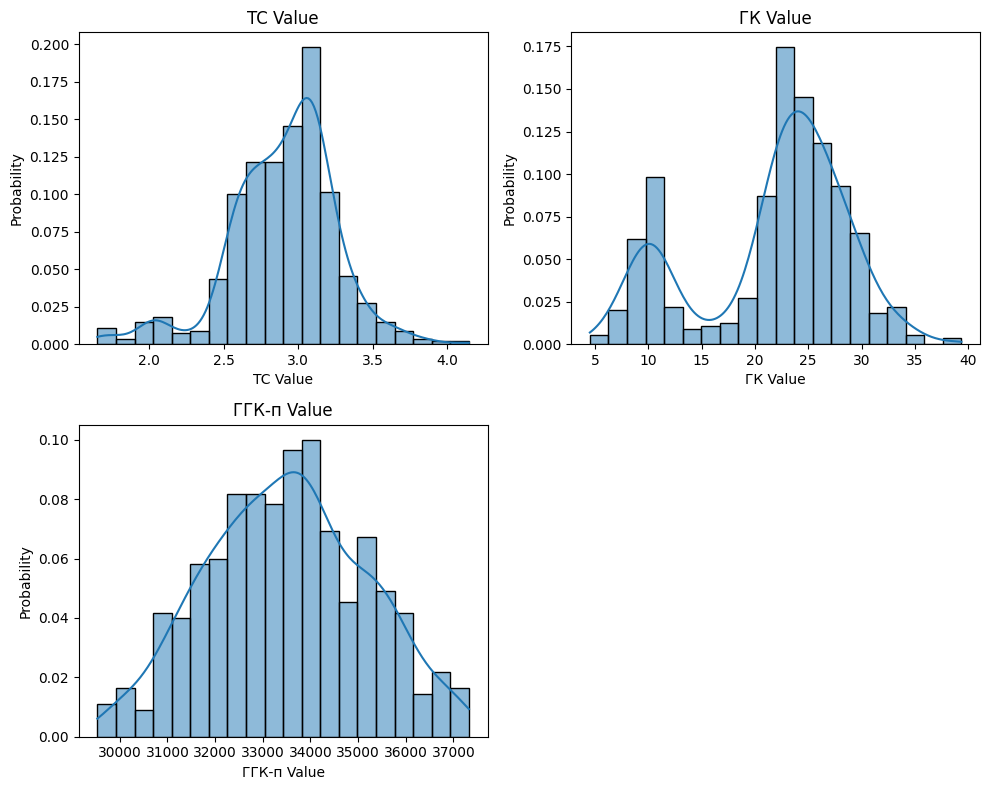

In [ ]:
# Assuming 'data' is your DataFrame and it's already defined

fig = plt.figure(figsize=(10, 8))

parameters_list = [ 'TC Value',
                   'ГК Value',
                   'ГГК-п Value'
]

# Calculate appropriate subplot grid size
rows = 2
cols = (len(parameters_list) + 1) // rows

for index, param in enumerate(parameters_list):
    ax = plt.subplot(rows, cols, index + 1)
    sns.histplot(data=result_new, x=param, stat="probability", kde=True, bins=20)
    plt.title(f'{param}')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Display the plot

In [ ]:
result_new.columns

Index(['Common Depth', 'Lithology', 'TC Value', 'ГК Value', 'ГГК-п Value'], dtype='object')

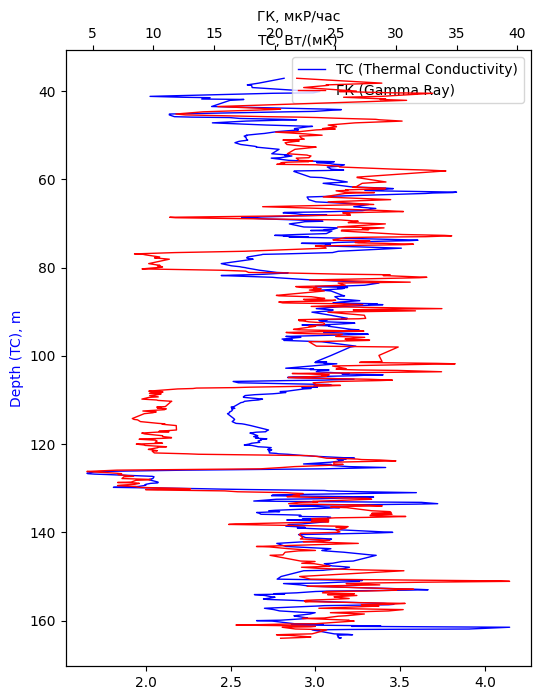

In [ ]:
fig, ax1 = plt.subplots(figsize=(6, 8))

data = result_new

# Data for the first plot
x1, y1 = data["TC Value"], data["Common Depth"]
ax1.plot(x1, y1, 'b-', label='TC (Thermal Conductivity)', lw=1)
ax1.set_ylabel('Depth (TC), m', color='b')
ax1.invert_yaxis()  # Invert the y-axis for the first plot
ax1.xaxis.tick_top()  # Move the x-axis to the top
ax1.xaxis.set_label_position('top')  # Label for the x-axis on top
ax1.set_xlabel('TC, Вт/(мК)')

# Create a second x-axis for the second plot
ax2 = ax1.twiny()  # This creates a new x-axis that shares the y-axis with ax1
x2, y2 = data["ГК Value"], data["Common Depth"]
ax2.plot(x2, y2, 'r-', label='ГК (Gamma Ray)', lw=1)
ax2.set_xlabel('ГК, мкР/час')

# Set y-axis label for the second plot (optional if you want separate y-axis labels)
ax2.set_ylabel('Глубина (ГК),м', color='r')

# Add legends to the plot
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='best')

plt.show()

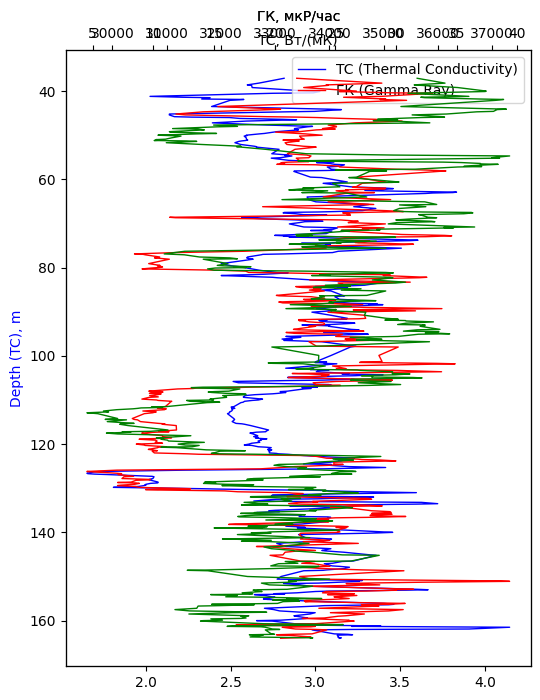

In [ ]:
fig, ax1 = plt.subplots(figsize=(6, 8))

data = merged_data

# Data for the first plot
x1, y1 = data["TC Value"], data["Common Depth"]
ax1.plot(x1, y1, 'b-', label='TC (Thermal Conductivity)', lw=1)
ax1.set_ylabel('Depth (TC), m', color='b')
ax1.invert_yaxis()  # Invert the y-axis for the first plot
ax1.xaxis.tick_top()  # Move the x-axis to the top
ax1.xaxis.set_label_position('top')  # Label for the x-axis on top
ax1.set_xlabel('TC, Вт/(мК)')

# Create a second x-axis for the second plot
ax2 = ax1.twiny()  # This creates a new x-axis that shares the y-axis with ax1
x2, y2 = data["ГК Value"], data["Common Depth"]
ax2.plot(x2, y2, 'r-', label='ГК (Gamma Ray)', lw=1)
ax2.set_xlabel('ГК, мкР/час')

# Set y-axis label for the second plot (optional if you want separate y-axis labels)
ax2.set_ylabel('Глубина (ГК),м', color='r')

ax3 = ax1.twiny()  # This creates a new x-axis that shares the y-axis with ax1
x3, y3 = data["ГГК-п Value"], data["Common Depth"]
ax3.plot(x3, y3, 'g-', label='ГК (Gamma Ray)', lw=1)
ax3.set_xlabel('ГК, мкР/час')

# Add legends to the plot
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='best')

plt.show()

In [ ]:
X = result_new.drop('TC Value', axis=1)
y = result_new["TC Value"]
n = len(X)

Label encoding and normalization

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
categorical_clmn = X.select_dtypes(include='object').columns
# Apply Label Encoding to each categorical column
for col in categorical_clmn:
    X[col] = LabelEncoder().fit_transform(X[col])

<Axes: >

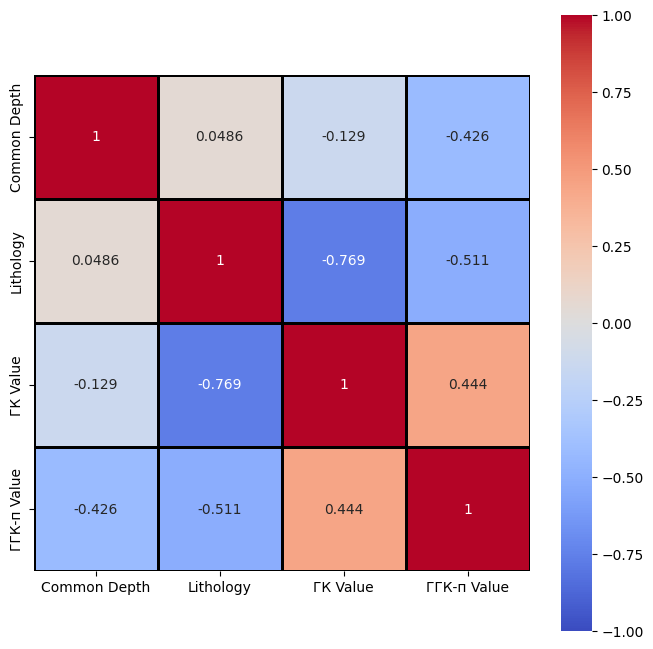

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(X.corr(),fmt = '.3g', square=True, annot = True,
            vmin=-1, vmax=1, center= 0, cmap= 'coolwarm',
            linewidths=1, linecolor='black')

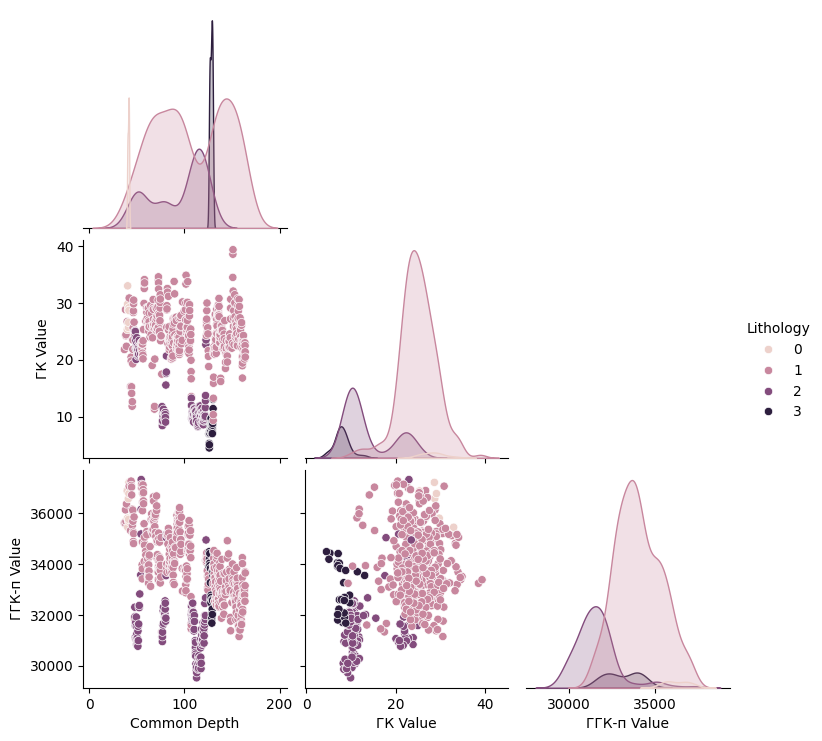

In [ ]:
sns.pairplot(data=X,hue='Lithology', corner=True)

In [ ]:
# Normalization of data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
columns_name = X.select_dtypes(include='float64')
X_numerical = X[['Common Depth', 'ГК Value', 'ГГК-п Value']]
X[list(columns_name)] = scaler.fit_transform(X_numerical[list(columns_name)])

In [ ]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=int(n*0.15), random_state=0xC0FFEE)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=int(n*0.15), random_state=0xC0FFEE)

In [ ]:
X.shape

(550, 4)

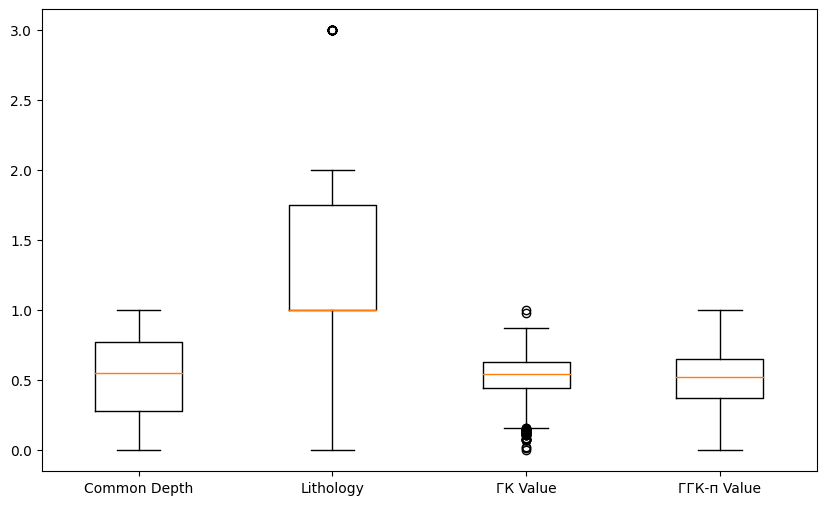

RandomForestRegressor:
Train mse: 0.02
Train R^2: 0.88
Validation: 0.04
Validation R^2: 0.5
Test: 0.03
Test  R^2: 0.77
{'max_features': 2, 'min_samples_split': 8, 'n_estimators': 10} 

ExtraTreesRegressor:
Train mse: 0.01
Train R^2: 0.91
Validation: 0.03
Validation R^2: 0.57
Test: 0.03
Test  R^2: 0.7
{'max_features': 3, 'min_samples_split': 6, 'n_estimators': 4} 

XGBRegressor:
Train mse: 0.04
Train R^2: 0.68
Validation: 0.04
Validation R^2: 0.39
Test: 0.03
Test  R^2: 0.65
{'learning_rate': 0.5025, 'max_depth': 1, 'n_estimators': 27} 

LinearRegression:
Train mse: 0.08
Train R^2: 0.44
Validation: 0.06
Validation R^2: -0.18
Test: 0.04
Test  R^2: 0.19
{} 

Ridge:
Train mse: 0.08
Train R^2: 0.44
Validation: 0.06
Validation R^2: -0.19
Test: 0.04
Test  R^2: 0.17
{} 

KNeighborsRegressor:
Train mse: 0.03
Train R^2: 0.79
Validation: 0.05
Validation R^2: 0.35
Test: 0.03
Test  R^2: 0.75
{} 

DecisionTreeRegressor:
Train mse: 0.0
Train R^2: 1.0
Validation: 0.05
Validation R^2: 0.51
Test: 0.03
Te

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import xgboost as xgb
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor



RMSE_validation, RMSE_test = [], []
R2_validation, R2_test = [], []
model_name = []

plt.figure(figsize=(10, 6))

# Assuming X_train is defined and is a DataFrame
data = [X_train[i] for i in X_train.columns]

plt.boxplot(data, labels=X_train.columns)
plt.show()

models_list = [
    RandomForestRegressor(random_state=0xC0FFEE),
    ExtraTreesRegressor(random_state=0xC0FFEE),
    xgb.XGBRegressor(random_state=0xC0FFEE),
    LinearRegression(),
    Ridge(),
    KNeighborsRegressor(),
    DecisionTreeRegressor()
]

# names = ['Linear Regression', 'Ridge Regression', 'Lasso Regression',
#          'K Neighbors Regressor', 'Decision Tree Regressor',
#          'Random Forest Regressor', 'Gradient Boosting Regressor',
#          'Adaboost Regressor']
# models = [LinearRegression(), Ridge(), Lasso(),
#           KNeighborsRegressor(), DecisionTreeRegressor(),
#           RandomForestRegressor(), GradientBoostingRegressor(),
#           AdaBoostRegressor()]

# Ensure that the range for max_features is valid
min_features = min(1, X_train.shape[1])
max_features = max(1, X_train.shape[1])

p_g1 = {
    'max_features': np.arange(min_features, max_features + 1),
    'n_estimators': np.linspace(2, 10, 4, dtype=int),
    'min_samples_split': np.arange(2, 10, 2),
}

p_g2 = {
    'max_features': np.arange(min_features, max_features + 1),
    'n_estimators': np.linspace(2, 10, 4, dtype=int),
    'min_samples_split': np.arange(2, 10, 2),
}

p_g3 = {
    "max_depth": np.arange(min_features, max_features + 1),
    'n_estimators': np.linspace(2, 40, 4, dtype=int),
    "learning_rate": np.linspace(0.005, 1 , 5),
}

p_g4 = {
}



params_list = [p_g1, p_g2, p_g3, p_g4, p_g4, p_g4, p_g4]

for reg, grid in zip(models_list, params_list):

    model_name.append(type(reg).__name__)

  # search for the optimal hyperparameters
    gs = GridSearchCV(reg, param_grid=grid, n_jobs=-1)
    gs.fit(X_val, y_val)
    best_reg = reg.__class__(**gs.best_params_)
    print(f'{type(reg).__name__}:')


  # use these values for our hyperparameters in the final calculation
    best_reg.fit(X_train, y_train)
    y_pred = best_reg.predict(X_train)
    print('Train mse:', mean_squared_error(y_pred, y_train).round(2))
    print('Train R^2:', r2_score(y_train, y_pred).round(2))

    y_pred = best_reg.predict(X_val)
    print('Validation:', mean_squared_error(y_pred, y_val).round(2))
    print('Validation R^2:', r2_score(y_pred, y_val).round(2))
    RMSE_validation.append(mean_squared_error(y_pred, y_val).round(2))
    R2_validation.append(r2_score(y_pred, y_val).round(2))

    y_pred = best_reg.predict(X_test)
    print('Test:', mean_squared_error(y_pred, y_test).round(2))
    print('Test  R^2:', r2_score(y_pred, y_test).round(2))
    RMSE_test.append(mean_squared_error(y_pred,y_test).round(2))
    R2_test.append(r2_score(y_pred,y_test).round(2))
    print(gs.best_params_, '\n')

In [ ]:
evaluation = pd.DataFrame({'Model': model_name,
                           'RMSE val': RMSE_validation,
                           'R2 val': R2_validation,
                           'RMSE test': RMSE_test,
                           'R2 test': R2_test})
print("FOLLOWING ARE THE TRAINING SCORES: ")
evaluation

FOLLOWING ARE THE TRAINING SCORES: 


Model  RMSE val  R2 val  RMSE test  R2 test
0  RandomForestRegressor      0.04    0.50       0.03     0.77
1    ExtraTreesRegressor      0.03    0.57       0.03     0.70
2           XGBRegressor      0.04    0.39       0.03     0.65
3       LinearRegression      0.06   -0.18       0.04     0.19
4                  Ridge      0.06   -0.19       0.04     0.17
5    KNeighborsRegressor      0.05    0.35       0.03     0.75
6  DecisionTreeRegressor      0.05    0.51       0.03     0.77

Train R^2: 0.65


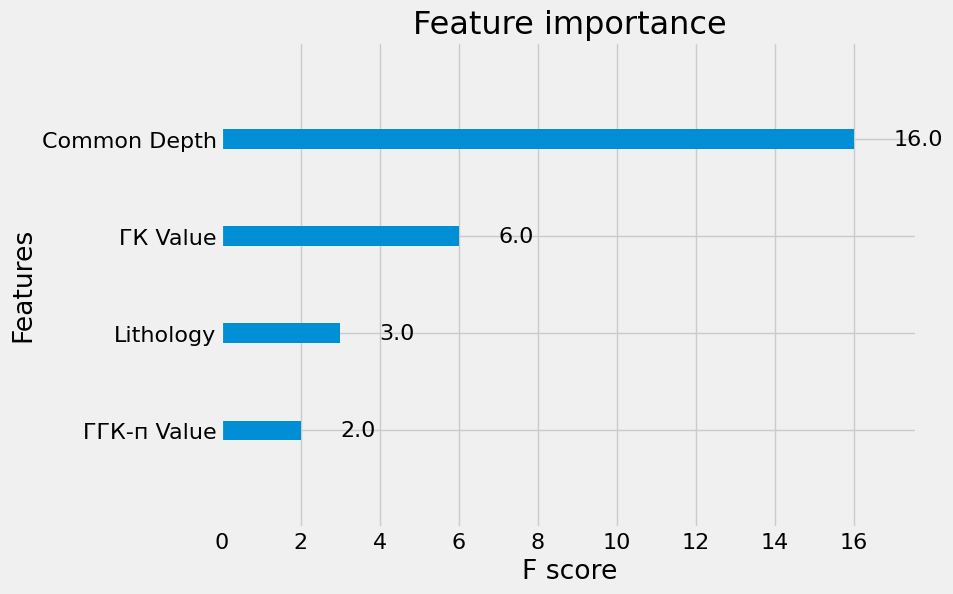

(1.5, 4.0)

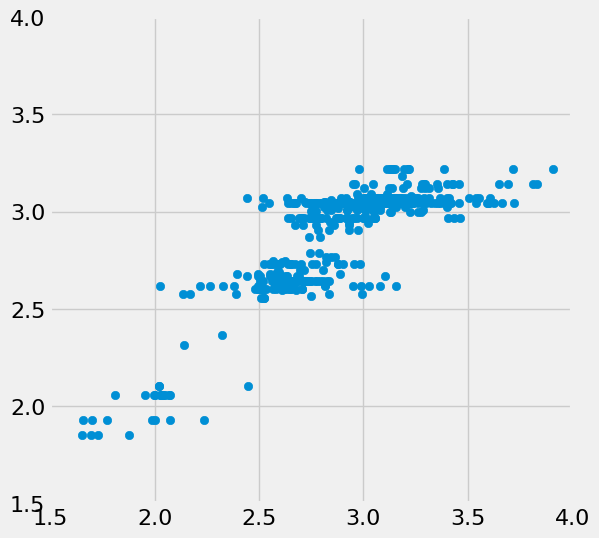

In [ ]:
best_xgb_regressor=xgb.XGBRegressor(
                          learning_rate = 0.5025,
                          n_estimators  = 27,
                          max_depth     = 1,
                          eval_metric='rmse')

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.12)
best_xgb_regressor.fit(X_train, y_train)
predictions = best_xgb_regressor.predict(X_test)
print('Train R^2:', r2_score(y_test, predictions).round(2))


# the feature importance for xgb!
from xgboost import plot_importance
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
plt.rcParams.update({'font.size': 16})

fig, ax = plt.subplots(figsize=(8,6))
plot_importance(best_xgb_regressor, max_num_features=4, ax=ax)
plt.show();


# prediction for the whole dataset
y_pred = best_xgb_regressor.predict(X)

fig, ax = plt.subplots(figsize=(6,6))
plt.scatter(y, y_pred)
plt.xlim(1.5, 4)
plt.ylim(1.5, 4)

In [ ]:

# Assuming X and y are defined and are your full dataset and targets
# Assuming X_train, X_val, y_train, y_val are subsets used for the grid search

# Define the parameter grid based on previous setup
param_grid = {
    'max_features': np.arange(min(1, X_train.shape[1]), max(1, X_train.shape[1]) + 1),
    'n_estimators': np.linspace(2, 20, 4, dtype=int),
    'min_samples_split': np.arange(2, 10, 2),
}

# Initialize the ExtraTreesRegressor with a fixed random state
# extra_trees = ExtraTreesRegressor(random_state=0xC0FFEE)
extra_trees = RandomForestRegressor(random_state=0xC0FFEE)


# Setup GridSearchCV
gs = GridSearchCV(extra_trees, param_grid=param_grid, n_jobs=-1)
gs.fit(X_val, y_val)  # Fit on validation set, or use another appropriate subset

# Extract the best parameters and fit on the entire dataset
best_params = gs.best_params_
best_extra_trees = ExtraTreesRegressor(**best_params, random_state=0xC0FFEE)
best_extra_trees.fit(X, y)  # Fit on the entire dataset
print(best_params)

# Predict the values of y
y_pred = best_extra_trees.predict(X)

{'max_features': 2, 'min_samples_split': 8, 'n_estimators': 20}


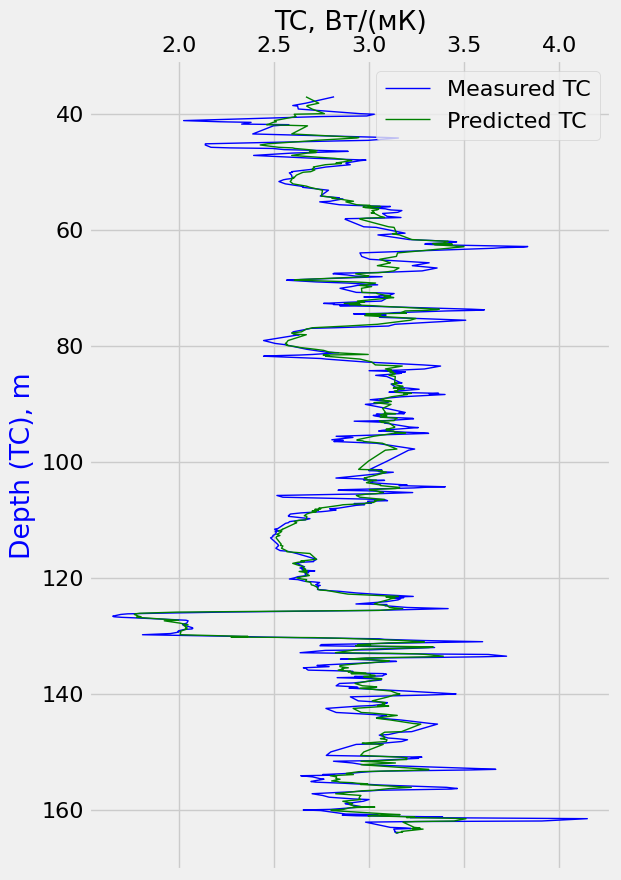

In [ ]:
fig, ax1 = plt.subplots(figsize=(6, 10))

# Data for the first plot
x1, y1 = merged_data["TC Value"], merged_data["Common Depth"]
ax1.plot(x1, y1, 'b-', label='Measured TC', lw=1)
x1, y1 = y_pred, merged_data["Common Depth"]
ax1.plot(x1, y1, 'g-', label='Predicted TC', lw=1)
ax1.set_ylabel('Depth (TC), m', color='b')

ax1.invert_yaxis()  # Invert the y-axis for the first plot
ax1.xaxis.tick_top()  # Move the x-axis to the top
ax1.xaxis.set_label_position('top')  # Label for the x-axis on top
ax1.set_xlabel('TC, Вт/(мК)')
ax1.legend()

plt.show()

### Reg vs ML

In [ ]:
path_to_ser = Path('/content/Ros.xlsx')
data_reg = pd.read_excel(path_to_ser, skiprows=0)

In [ ]:
data_reg.columns

Index([6, '25-30', 'TC Exp', 'GK', 'TC pred', 'diff'], dtype='object')

In [ ]:
merged_data[10::]

TC Value  Common Depth  ГК Value  ГГК-п Value
10   2.218660          41.4     25.68     35686.67
11   2.378956          41.5     26.57     35760.00
12   2.329364          41.8     29.15     36773.33
13   2.577912          41.9     28.69     37213.33
14   2.496474          42.1     30.87     37065.00
..        ...           ...       ...          ...
545  3.129074         163.3     21.05     32780.00
546  3.136196         163.7     22.99     32540.00
547  3.134156         163.8     22.50     33155.00
548  3.153052         163.9     21.41     33695.00
549  3.141634         164.0     20.49     33653.33

[540 rows x 4 columns]

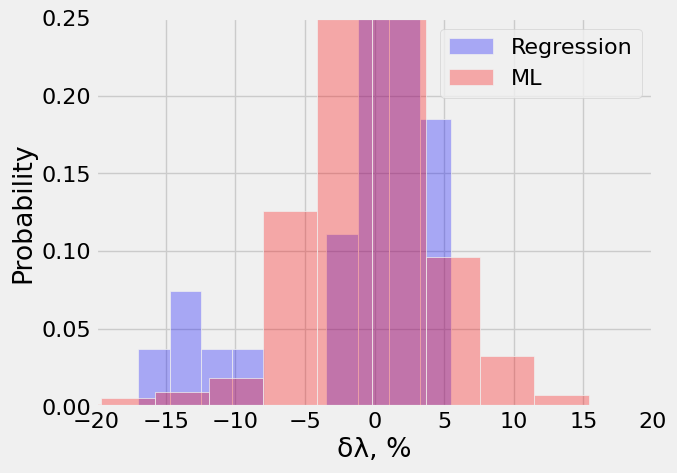

In [ ]:
fig, ax = plt.subplots()

x1 = merged_data["TC Value"]
x2 = y_pred
x3 = (x1-x2)/x1*100

# Plot both histograms on the same Axes
# sns.histplot(data=x1, bins=20, ax=ax, color="blue", label="Data X1")
sns.histplot(data=data_reg['diff'], bins=10, ax=ax, stat="probability", color="blue", alpha=0.3, label='Regression')
sns.histplot(data=x3, bins=10, ax=ax, stat="probability", color="red", alpha=0.3, label='ML')

# Add legend to distinguish the histograms
ax.legend()
ax.set_xlim(-20, 20)
ax.set_ylim(0, 0.25)

ax.set_xlabel('δλ, %')


# Show the plot
plt.show()

### Application to the whole subset

In [ ]:
path_to_ser = Path('/content/Rosatom/Data/Rosatom.xlsx')
data = pd.read_excel(path_to_ser, skiprows=0)
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [ ]:
new_data = data[["ГК, мкР/час", "Глубина (ГК),м", "ГГК-п имп/мин", "Глубина (ГГК-п), м"]]
new_data = new_data.dropna(subset=['ГК, мкР/час', 'ГГК-п имп/мин'])

In [ ]:
new_merged_data = pd.merge(
    new_data,
    new_data[['ГГК-п имп/мин', 'Глубина (ГГК-п), м']],
    left_on='Глубина (ГК),м',
    right_on='Глубина (ГГК-п), м',
    how='inner'
)

In [ ]:
new_merged_data

ГК, мкР/час  Глубина (ГК),м  ГГК-п имп/мин_x  Глубина (ГГК-п), м_x  \
0           11.41             1.9         52880.00                   3.7   
1           11.17             2.0         52813.33                   3.8   
2           11.66             2.1         53106.67                   3.9   
3           11.15             2.2         53235.00                   4.0   
4           10.11             2.3         53535.00                   4.1   
...           ...             ...              ...                   ...   
1609        25.39           162.8         32830.00                 164.6   
1610        24.24           162.9         32795.00                 164.7   
1611        23.08           163.0         32250.00                 164.8   
1612        21.38           163.1         31820.00                 164.9   
1613        20.15           163.2         29530.00                 165.0   

      ГГК-п имп/мин_y  Глубина (ГГК-п), м_y  
0            48640.00                   1.9  
1            50190.00                   2.0  
2            50580.00                   2.1  
3            50580.00                   2.2  
4            51220.00                   2.3  
...               ...                   ...  
1609         33106.67                 162.8  
1610         33320.00                 162.9  
1611         32930.00                 163.0  
1612         32990.00                 163.1  
1613         32525.00                 163.2  

[1614 rows x 6 columns]

In [ ]:
data_to_use = new_merged_data[['ГК, мкР/час',	'Глубина (ГК),м',	'ГГК-п имп/мин_x']]

In [ ]:
data_to_use.rename(columns={
    'Глубина (ГК),м': 'Common Depth',
    'ГГК-п имп/мин_x': 'ГГК-п Value',
    'ГК, мкР/час': 'ГК Value'
}, inplace=True)

In [ ]:
X = data_to_use.copy()
n = len(X)

In [ ]:
# Normalization of data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
columns_name = X.select_dtypes(include='float64')
X[list(columns_name)] = scaler.fit_transform(X[list(columns_name)])

In [ ]:
X

ГК Value  Common Depth  ГГК-п Value
0     0.197531       0.00000     0.581445
1     0.190640       0.00062     0.579808
2     0.204709       0.00124     0.587008
3     0.190066       0.00186     0.590158
4     0.160207       0.00248     0.597521
...        ...           ...          ...
1609  0.598909       0.99752     0.089340
1610  0.565891       0.99814     0.088481
1611  0.532587       0.99876     0.075104
1612  0.483778       0.99938     0.064550
1613  0.448464       1.00000     0.008345

[1614 rows x 3 columns]

In [ ]:

X_order = X[['Common Depth', 'ГК Value', 'ГГК-п Value']]
X_order

Common Depth  ГК Value  ГГК-п Value
0          0.00000  0.197531     0.581445
1          0.00062  0.190640     0.579808
2          0.00124  0.204709     0.587008
3          0.00186  0.190066     0.590158
4          0.00248  0.160207     0.597521
...            ...       ...          ...
1609       0.99752  0.598909     0.089340
1610       0.99814  0.565891     0.088481
1611       0.99876  0.532587     0.075104
1612       0.99938  0.483778     0.064550
1613       1.00000  0.448464     0.008345

[1614 rows x 3 columns]

In [ ]:
# Predict the values of y
y_pred = best_extra_trees.predict(X_order)

In [ ]:
y_pred.shape

(1614,)

In [ ]:
path_to_ser = Path('/content/Rosatom/Data/Rosatom.xlsx')
data = pd.read_excel(path_to_ser, skiprows=0)

In [ ]:
y = data['TC, Вт/(мК)']
yy = data["Depth (TC), m"]

In [ ]:
df_new = pd.DataFrame()
df_new['TC avg'] = data['TC, Вт/(мК)'].rolling(window=1000).mean()
df_new['Depth TC avg'] = data["Depth (TC), m"].rolling(window=1000).mean()

In [ ]:
y.shape, yy.shape

((97768,), (97768,))

In [ ]:
df_new = df_new.dropna(subset='TC avg')
df_new.shape

(96269, 2)

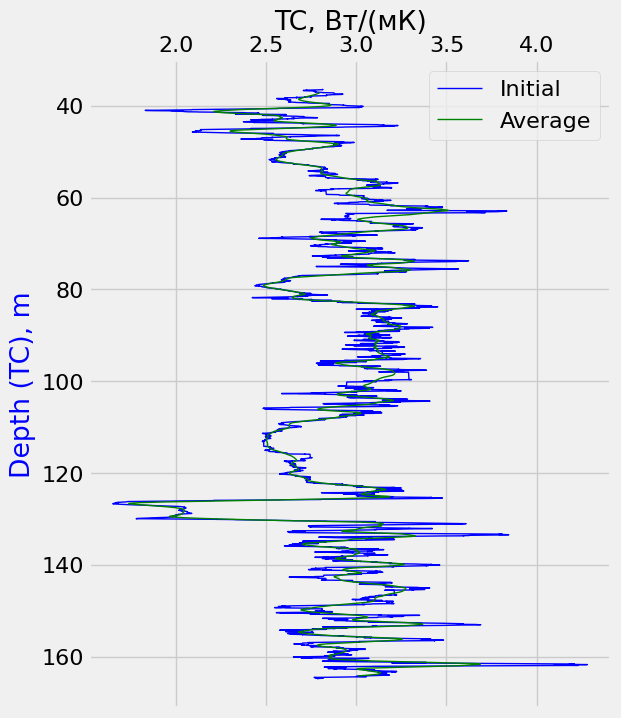

In [ ]:
fig, ax1 = plt.subplots(figsize=(6, 8))


# Data for the first plot
x1, y1 = y, yy
ax1.plot(x1, y1, 'b-', label='Initial', lw=1)

x1, y1 = df_new['TC avg'], df_new['Depth TC avg']
ax1.plot(x1, y1, 'g-', label='Average', lw=1)
ax1.set_ylabel('Depth (TC), m', color='b')

ax1.invert_yaxis()  # Invert the y-axis for the first plot
ax1.xaxis.tick_top()  # Move the x-axis to the top
ax1.xaxis.set_label_position('top')  # Label for the x-axis on top
ax1.set_xlabel('TC, Вт/(мК)')
ax1.legend()

plt.show()

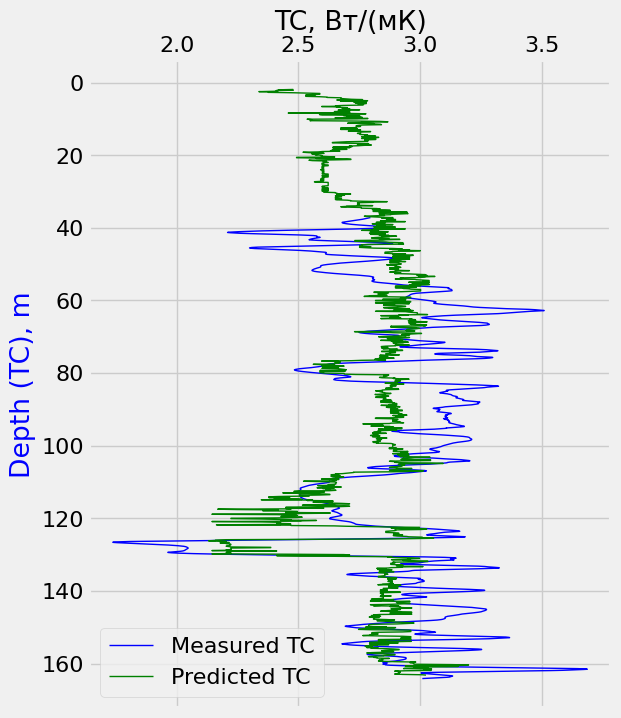

In [ ]:
fig, ax1 = plt.subplots(figsize=(6, 8))

data = merged_data

# Data for the first plot
# x1, y1 = y, yy
x1, y1 = df_new['TC avg'], df_new['Depth TC avg']
ax1.plot(x1, y1, 'b-', label='Measured TC', lw=1)
x1, y1 = y_pred, data_to_use["Common Depth"]
ax1.plot(x1, y1, 'g-', label='Predicted TC', lw=1)
ax1.set_ylabel('Depth (TC), m', color='b')

ax1.invert_yaxis()  # Invert the y-axis for the first plot
ax1.xaxis.tick_top()  # Move the x-axis to the top
ax1.xaxis.set_label_position('top')  # Label for the x-axis on top
ax1.set_xlabel('TC, Вт/(мК)')
ax1.legend()

plt.show()

In [ ]:
path_to_ser = Path('/content/Rosatom/Data/Rosatom.xlsx')
data = pd.read_excel(path_to_ser, skiprows=0)
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [ ]:
data.columns

Index(['Sample ID', 'Depth (TC), m', 'TC, Вт/(мК)', 'Глубина (ГК),м',
       'ГК, мкР/час', 'Глубина (ГГК-п), м', 'ГГК-п имп/мин', 'Unnamed: 7',
       'Глубина (ПС), м', 'ПС', '№ образца', 'Глубина', '№ ящика', 'Интервал',
       'Top, m', 'Bot, m', 'L, m', 'Lcorr', 'Примечание',
       'Литологическое описание'],
      dtype='object')

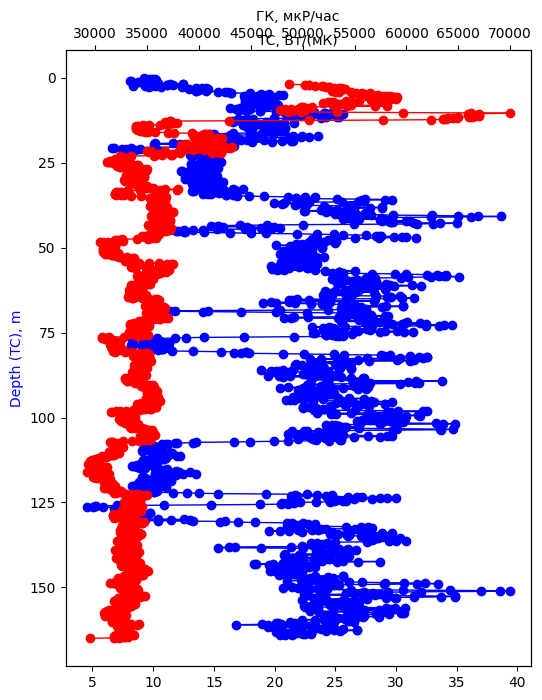

In [ ]:
# Data for the first plot
fig, ax1 = plt.subplots(figsize=(6, 8))
x1, y1 = data["ГК, мкР/час"], data["Глубина (ГК),м"]
ax1.plot(x1, y1, 'b-', label='TC (Thermal Conductivity)', marker='o', lw=1)
ax1.set_ylabel('Depth (TC), m', color='b')
ax1.invert_yaxis()  # Invert the y-axis for the first plot
ax1.xaxis.tick_top()  # Move the x-axis to the top
ax1.xaxis.set_label_position('top')  # Label for the x-axis on top
ax1.set_xlabel('TC, Вт/(мК)')

# Create a second x-axis for the second plot
ax2 = ax1.twiny()  # This creates a new x-axis that shares the y-axis with ax1
x2, y2 = data["ГГК-п имп/мин"], data["Глубина (ГГК-п), м"]
ax2.plot(x2, y2, 'r-', label='ГК (Gamma Ray)', marker='o', lw=1)
ax2.set_xlabel('ГК, мкР/час')

# Set y-axis label for the second plot (optional if you want separate y-axis labels)
ax2.set_ylabel('Глубина (ГК),м', color='r')
plt.show()

In [ ]:
X = data[["ГК, мкР/час", "Глубина (ГК),м", "ГГК-п имп/мин", "Глубина (ГГК-п), м"]]
n = len(X)

In [ ]:
# Normalization of data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
columns_name = X.select_dtypes(include='float64')
X[list(columns_name)] = scaler.fit_transform(X[list(columns_name)])

<ipython-input-13-40c11b84dd77>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[list(columns_name)] = scaler.fit_transform(X[list(columns_name)])


In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
import numpy as np

# Parameters
max_features = 2
n_estimators = 10
min_samples_split = 6

# Create the ExtraTreesRegressor object with specified parameters
etr = ExtraTreesRegressor(max_features=max_features, n_estimators=n_estimators, min_samples_split=min_samples_split, random_state=0xC0FFEE)

# Assuming X_train and y_train are defined and contain the training data
etr.fit(X_train, y_train)  # Fit the model with training data

# Assuming X contains the new data you want to predict
y_pred = etr.predict(X)  # Make predictions on new data

NotFittedError: This ExtraTreesRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

### With Lithology

In [ ]:
X = result_new.drop('TC Value', axis=1)
y = result_new["TC Value"]
n = len(X)

In [ ]:
X.head()

Common Depth Lithology  ГК Value  ГГК-п Value
0          37.1    Гнейсы     21.82     35620.00
1          38.2    Гнейсы     28.83     36133.33
2          38.6    Гнейсы     24.24     35565.00
3          38.7    Гнейсы     24.42     35685.00
4          39.2    Гнейсы     22.39     36366.67

### Categorical to label encoding and drop columns

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
categorical_clmn = X.select_dtypes(include='object').columns
# Apply Label Encoding to each categorical column
for col in categorical_clmn:
    X[col] = LabelEncoder().fit_transform(X[col])

<Axes: >

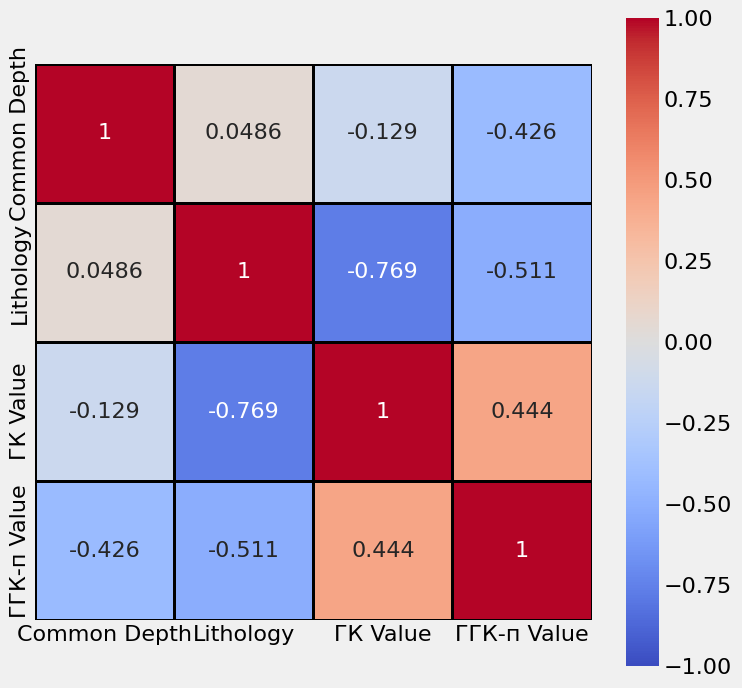

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(X.corr(),fmt = '.3g', square=True, annot = True,
            vmin=-1, vmax=1, center= 0, cmap= 'coolwarm',
            linewidths=1, linecolor='black')

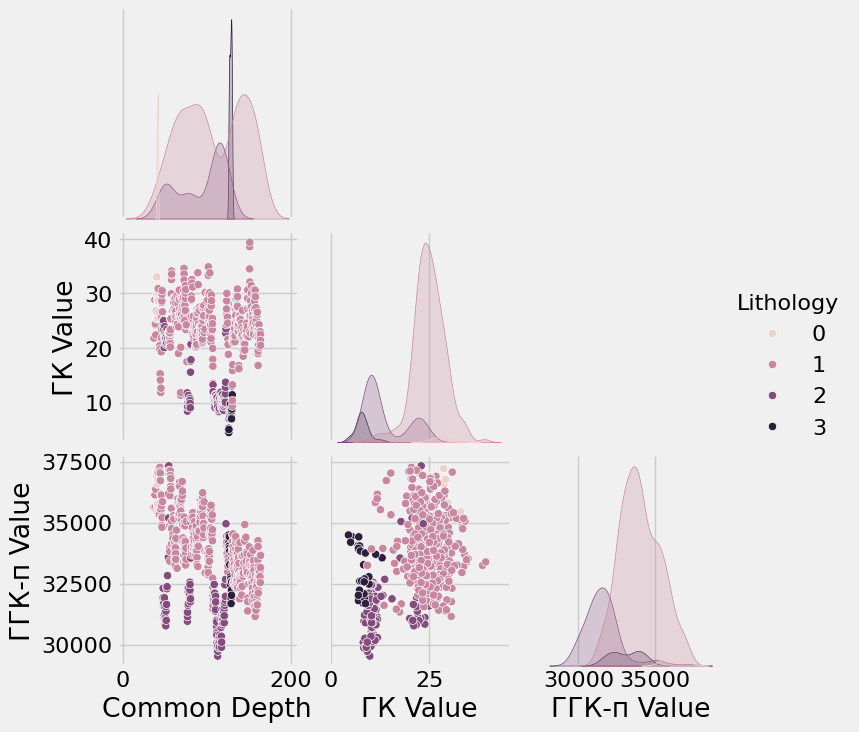

In [ ]:
sns.pairplot(data=X,hue='Lithology', corner=True)

In [ ]:
X.columns

Index(['Common Depth', 'Lithology', 'ГК Value', 'ГГК-п Value'], dtype='object')

In [ ]:
# Normalization of data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
columns_name = X.select_dtypes(include='float64')
X_numerical = X[['Common Depth', 'ГК Value', 'ГГК-п Value']]
X[list(columns_name)] = scaler.fit_transform(X_numerical[list(columns_name)])

In [ ]:
X

Common Depth  Lithology  ГК Value  ГГК-п Value
0        0.000000          1  0.496411     0.781270
1        0.008668          1  0.697674     0.847124
2        0.011820          1  0.565891     0.774214
3        0.012608          1  0.571059     0.789609
4        0.016548          1  0.512776     0.877058
..            ...        ...       ...          ...
545      0.994484          1  0.474304     0.416934
546      0.997636          1  0.530003     0.386145
547      0.998424          1  0.515935     0.465042
548      0.999212          1  0.484640     0.534317
549      1.000000          1  0.458226     0.528971

[550 rows x 4 columns]

In [ ]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=int(n*0.15), random_state=0xC0FFEE)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=int(n*0.15), random_state=0xC0FFEE)

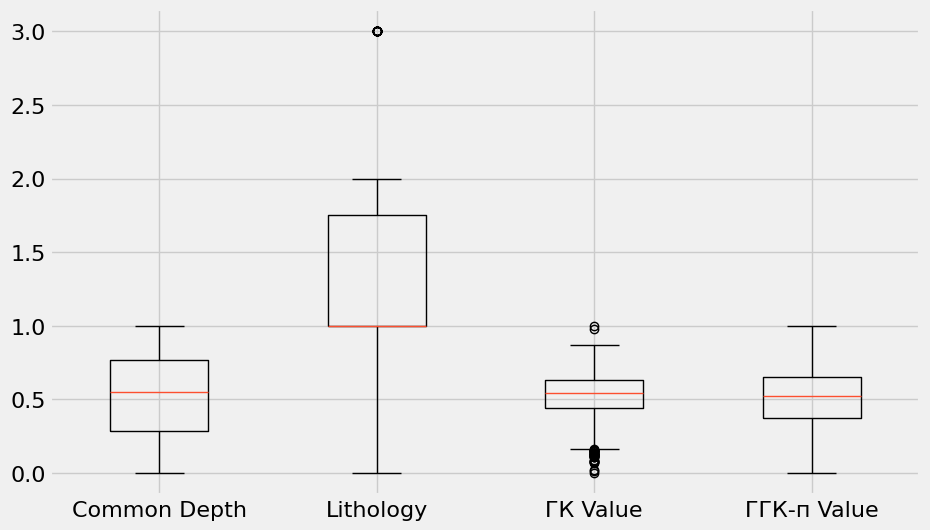

RandomForestRegressor:
Train mse: 0.02
Train R^2: 0.88
Validation: 0.04
Validation R^2: 0.46
Test: 0.03
Test  R^2: 0.76
{'max_features': 2, 'min_samples_split': 8, 'n_estimators': 10} 

ExtraTreesRegressor:
Train mse: 0.01
Train R^2: 0.91
Validation: 0.04
Validation R^2: 0.41
Test: 0.03
Test  R^2: 0.69
{'max_features': 3, 'min_samples_split': 6, 'n_estimators': 4} 

XGBRegressor:
Train mse: 0.04
Train R^2: 0.68
Validation: 0.04
Validation R^2: 0.39
Test: 0.03
Test  R^2: 0.65
{'learning_rate': 0.5025, 'max_depth': 1, 'n_estimators': 27} 

LinearRegression:
Train mse: 0.08
Train R^2: 0.44
Validation: 0.06
Validation R^2: -0.18
Test: 0.04
Test  R^2: 0.19
{} 

Ridge:
Train mse: 0.08
Train R^2: 0.44
Validation: 0.06
Validation R^2: -0.19
Test: 0.04
Test  R^2: 0.17
{} 

KNeighborsRegressor:
Train mse: 0.03
Train R^2: 0.79
Validation: 0.05
Validation R^2: 0.35
Test: 0.03
Test  R^2: 0.75
{} 

DecisionTreeRegressor:
Train mse: 0.0
Train R^2: 1.0
Validation: 0.05
Validation R^2: 0.55
Test: 0.03


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import xgboost as xgb
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

RMSE_validation, RMSE_test = [], []
R2_validation, R2_test = [], []
model_name = []

plt.figure(figsize=(10, 6))

# Assuming X_train is defined and is a DataFrame
data = [X_train[i] for i in X_train.columns]

plt.boxplot(data, labels=X_train.columns)
plt.show()

models_list = [
    RandomForestRegressor(random_state=0xC0FFEE),
    ExtraTreesRegressor(random_state=0xC0FFEE),
    xgb.XGBRegressor(random_state=0xC0FFEE),
    LinearRegression(),
    Ridge(),
    KNeighborsRegressor(),
    DecisionTreeRegressor()
]

# names = ['Linear Regression', 'Ridge Regression', 'Lasso Regression',
#          'K Neighbors Regressor', 'Decision Tree Regressor',
#          'Random Forest Regressor', 'Gradient Boosting Regressor',
#          'Adaboost Regressor']
# models = [LinearRegression(), Ridge(), Lasso(),
#           KNeighborsRegressor(), DecisionTreeRegressor(),
#           RandomForestRegressor(), GradientBoostingRegressor(),
#           AdaBoostRegressor()]

# Ensure that the range for max_features is valid
min_features = min(1, X_train.shape[1])
max_features = max(1, X_train.shape[1])

p_g1 = {
    'max_features': np.arange(min_features, max_features + 1),
    'n_estimators': np.linspace(2, 10, 4, dtype=int),
    'min_samples_split': np.arange(2, 10, 2),
}

p_g2 = {
    'max_features': np.arange(min_features, max_features + 1),
    'n_estimators': np.linspace(2, 10, 4, dtype=int),
    'min_samples_split': np.arange(2, 10, 2),
}

p_g3 = {
    "max_depth": np.arange(min_features, max_features + 1),
    'n_estimators': np.linspace(2, 40, 4, dtype=int),
    "learning_rate": np.linspace(0.005, 1 , 5),
}

p_g4 = {
}



params_list = [p_g1, p_g2, p_g3, p_g4, p_g4, p_g4, p_g4]

for reg, grid in zip(models_list, params_list):

    model_name.append(type(reg).__name__)

  # search for the optimal hyperparameters
    gs = GridSearchCV(reg, param_grid=grid, n_jobs=-1)
    gs.fit(X_val, y_val)
    best_reg = reg.__class__(**gs.best_params_)
    print(f'{type(reg).__name__}:')


  # use these values for our hyperparameters in the final calculation
    best_reg.fit(X_train, y_train)
    y_pred = best_reg.predict(X_train)
    print('Train mse:', mean_squared_error(y_pred, y_train).round(2))
    print('Train R^2:', r2_score(y_train, y_pred).round(2))

    y_pred = best_reg.predict(X_val)
    print('Validation:', mean_squared_error(y_pred, y_val).round(2))
    print('Validation R^2:', r2_score(y_pred, y_val).round(2))
    RMSE_validation.append(mean_squared_error(y_pred, y_val).round(2))
    R2_validation.append(r2_score(y_pred, y_val).round(2))

    y_pred = best_reg.predict(X_test)
    print('Test:', mean_squared_error(y_pred, y_test).round(2))
    print('Test  R^2:', r2_score(y_pred, y_test).round(2))
    RMSE_test.append(mean_squared_error(y_pred,y_test).round(2))
    R2_test.append(r2_score(y_pred,y_test).round(2))
    print(gs.best_params_, '\n')

In [ ]:
evaluation = pd.DataFrame({'Model': model_name,
                           'RMSE val': RMSE_validation,
                           'R2 val': R2_validation,
                           'RMSE test': RMSE_test,
                           'R2 test': R2_test})
print("FOLLOWING ARE THE TRAINING SCORES: ")
evaluation

FOLLOWING ARE THE TRAINING SCORES: 


Model  RMSE val  R2 val  RMSE test  R2 test
0  RandomForestRegressor      0.04    0.46       0.03     0.76
1    ExtraTreesRegressor      0.04    0.41       0.03     0.69
2           XGBRegressor      0.04    0.39       0.03     0.65
3       LinearRegression      0.06   -0.18       0.04     0.19
4                  Ridge      0.06   -0.19       0.04     0.17
5    KNeighborsRegressor      0.05    0.35       0.03     0.75
6  DecisionTreeRegressor      0.05    0.55       0.03     0.75

In [ ]:

# Assuming X and y are defined and are your full dataset and targets
# Assuming X_train, X_val, y_train, y_val are subsets used for the grid search

# Define the parameter grid based on previous setup
param_grid = {
    'max_features': np.arange(min(1, X_train.shape[1]), max(1, X_train.shape[1]) + 1),
    'n_estimators': np.linspace(2, 10, 4, dtype=int),
    'min_samples_split': np.arange(2, 10, 2),
}

# Initialize the ExtraTreesRegressor with a fixed random state
# extra_trees = ExtraTreesRegressor(random_state=0xC0FFEE)
extra_trees = RandomForestRegressor(random_state=0xC0FFEE)


# Setup GridSearchCV
gs = GridSearchCV(extra_trees, param_grid=param_grid, n_jobs=-1)
gs.fit(X_val, y_val)  # Fit on validation set, or use another appropriate subset

# Extract the best parameters and fit on the entire dataset
best_params = gs.best_params_
best_extra_trees = ExtraTreesRegressor(**best_params, random_state=0xC0FFEE)
best_extra_trees.fit(X, y)  # Fit on the entire dataset
print(best_params)

# Predict the values of y
y_pred = best_extra_trees.predict(X)

{'max_features': 2, 'min_samples_split': 8, 'n_estimators': 10}


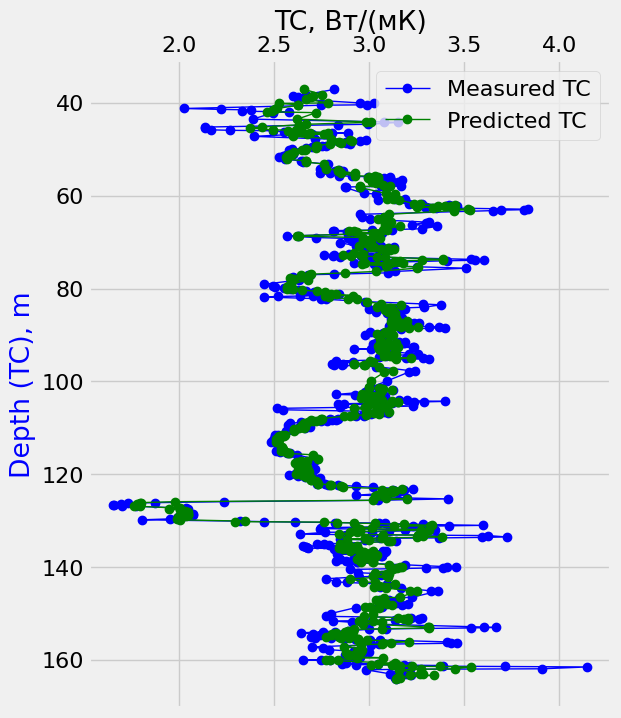

In [ ]:
fig, ax1 = plt.subplots(figsize=(6, 8))

# Data for the first plot
x1, y1 = merged_data["TC Value"], merged_data["Common Depth"]
ax1.plot(x1, y1, 'b-', label='Measured TC', marker='o', lw=1)
x1, y1 = y_pred, merged_data["Common Depth"]
ax1.plot(x1, y1, 'g-', label='Predicted TC', marker='o', lw=1)
ax1.set_ylabel('Depth (TC), m', color='b')

ax1.invert_yaxis()  # Invert the y-axis for the first plot
ax1.xaxis.tick_top()  # Move the x-axis to the top
ax1.xaxis.set_label_position('top')  # Label for the x-axis on top
ax1.set_xlabel('TC, Вт/(мК)')
ax1.legend()

plt.show()

Train R^2: 0.52


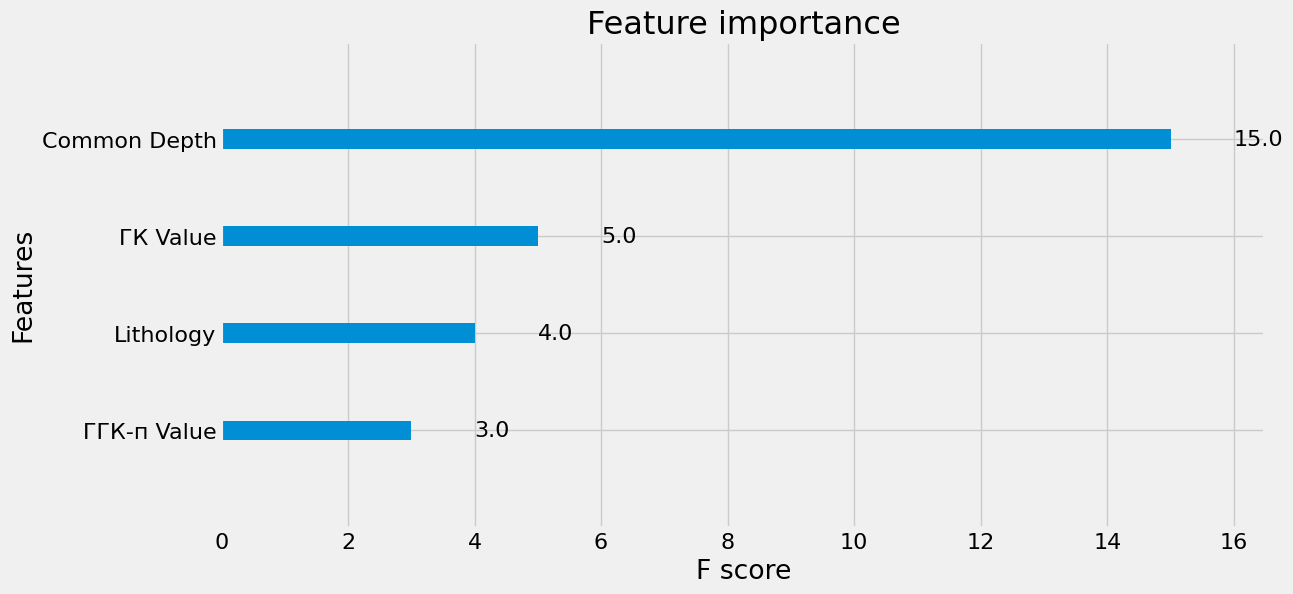

(1.5, 4.0)

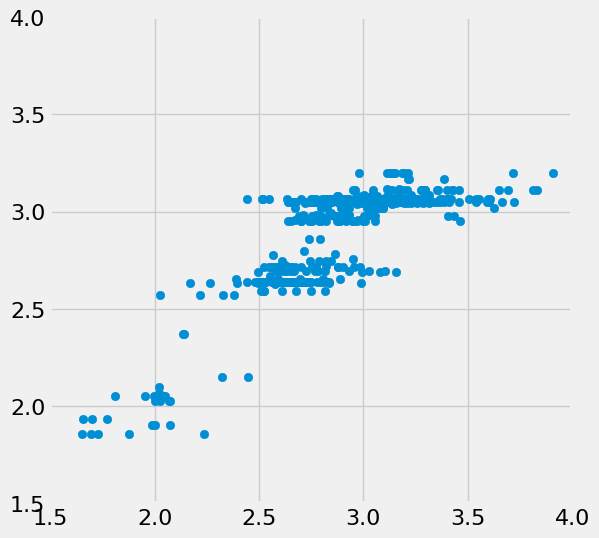

In [ ]:
best_xgb_regressor=xgb.XGBRegressor(
                          learning_rate = 0.5025,
                          n_estimators  = 27,
                          max_depth     = 1,
                          eval_metric='rmse')

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.12)
best_xgb_regressor.fit(X_train, y_train)
predictions = best_xgb_regressor.predict(X_test)
print('Train R^2:', r2_score(y_test, predictions).round(2))


# the feature importance for xgb!
from xgboost import plot_importance
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
plt.rcParams.update({'font.size': 16})

fig, ax = plt.subplots(figsize=(12,6))
plot_importance(best_xgb_regressor, max_num_features=4, ax=ax)
plt.show();


# prediction for the whole dataset
y_pred = best_xgb_regressor.predict(X)

fig, ax = plt.subplots(figsize=(6,6))
plt.scatter(y, y_pred)
plt.xlim(1.5, 4)
plt.ylim(1.5, 4)

In [ ]:
path_to_ser = Path('/content/Rosatom/Data/Rosatom.xlsx')
data = pd.read_excel(path_to_ser, skiprows=0)

In [ ]:
new_data = data[["ГК, мкР/час", "Глубина (ГК),м", "ГГК-п имп/мин", "Глубина (ГГК-п), м"]]
new_data = new_data.dropna(subset=['ГК, мкР/час', 'ГГК-п имп/мин'])

In [ ]:
new_merged_data = pd.merge(
    new_data,
    new_data[['ГГК-п имп/мин', 'Глубина (ГГК-п), м']],
    left_on='Глубина (ГК),м',
    right_on='Глубина (ГГК-п), м',
    how='inner'
)

In [ ]:
new_merged_data

ГК, мкР/час  Глубина (ГК),м  ГГК-п имп/мин_x  Глубина (ГГК-п), м_x  \
0           11.41             1.9         52880.00                   3.7   
1           11.17             2.0         52813.33                   3.8   
2           11.66             2.1         53106.67                   3.9   
3           11.15             2.2         53235.00                   4.0   
4           10.11             2.3         53535.00                   4.1   
...           ...             ...              ...                   ...   
1609        25.39           162.8         32830.00                 164.6   
1610        24.24           162.9         32795.00                 164.7   
1611        23.08           163.0         32250.00                 164.8   
1612        21.38           163.1         31820.00                 164.9   
1613        20.15           163.2         29530.00                 165.0   

      ГГК-п имп/мин_y  Глубина (ГГК-п), м_y  
0            48640.00                   1.9  
1            50190.00                   2.0  
2            50580.00                   2.1  
3            50580.00                   2.2  
4            51220.00                   2.3  
...               ...                   ...  
1609         33106.67                 162.8  
1610         33320.00                 162.9  
1611         32930.00                 163.0  
1612         32990.00                 163.1  
1613         32525.00                 163.2  

[1614 rows x 6 columns]

In [ ]:
data_to_use = new_merged_data[['ГК, мкР/час',	'Глубина (ГК),м',	'ГГК-п имп/мин_x']]

In [ ]:
lithology = data[['Кровля', 'Подошва','Литология']].dropna()

In [ ]:
lithology

Кровля  Подошва    Литология
0      5.0     19.0       Гнейсы
1     19.1     21.5     Вогезиты
2     21.6     35.1     Долериты
3     35.2     40.0       Гнейсы
4     40.1     42.0     Вогезиты
5     42.1     47.7       Гнейсы
6     47.8     55.0     Долериты
7     55.1     76.5       Гнейсы
8     76.6     81.3     Долериты
9     81.4    107.3       Гнейсы
10   107.4    123.1     Долериты
11   123.2    125.8       Гнейсы
12   125.9    130.2  Спессартиты
13   130.3    165.0       Гнейсы

In [ ]:
data_to_use

ГК, мкР/час  Глубина (ГК),м  ГГК-п имп/мин_x
0           11.41             1.9         52880.00
1           11.17             2.0         52813.33
2           11.66             2.1         53106.67
3           11.15             2.2         53235.00
4           10.11             2.3         53535.00
...           ...             ...              ...
1609        25.39           162.8         32830.00
1610        24.24           162.9         32795.00
1611        23.08           163.0         32250.00
1612        21.38           163.1         31820.00
1613        20.15           163.2         29530.00

[1614 rows x 3 columns]

In [ ]:
data_to_use.rename(columns={
    'Глубина (ГК),м': 'Common Depth',
    'ГГК-п имп/мин_x': 'ГГК-п Value',
    'ГК, мкР/час': 'ГК Value'
}, inplace=True)

In [ ]:
data_copy = data_to_use.copy()

In [ ]:
data_copy

ГК Value  Common Depth  ГГК-п Value
0        11.41           1.9     52880.00
1        11.17           2.0     52813.33
2        11.66           2.1     53106.67
3        11.15           2.2     53235.00
4        10.11           2.3     53535.00
...        ...           ...          ...
1609     25.39         162.8     32830.00
1610     24.24         162.9     32795.00
1611     23.08         163.0     32250.00
1612     21.38         163.1     31820.00
1613     20.15         163.2     29530.00

[1614 rows x 3 columns]

In [ ]:
def lit_func(lithology, merged_data):

  corresponding_lit = pd.DataFrame(columns=['Common Depth', 'Lithology'])

  for index, row in merged_data.iterrows():
      common_depth = row['Common Depth']
      mask = (lithology['Кровля'] <= common_depth) & (lithology['Подошва'] >= common_depth)
      filtered_lithology = lithology[mask]
      # print(common_depth, filtered_lithology )

      # if not filtered_lithology.empty:

      for _, lit_row in filtered_lithology.iterrows():
          new_row = pd.DataFrame({
              'Common Depth': [common_depth],
              'Lithology': [lit_row['Литология']]
          })
          corresponding_lit = pd.concat([corresponding_lit, new_row], ignore_index=True)

  return corresponding_lit

In [ ]:
lit_func(lithology, data_to_use)

Common Depth Lithology
0              5.0    Гнейсы
1              5.1    Гнейсы
2              5.2    Гнейсы
3              5.3    Гнейсы
4              5.4    Гнейсы
...            ...       ...
1578         162.8    Гнейсы
1579         162.9    Гнейсы
1580         163.0    Гнейсы
1581         163.1    Гнейсы
1582         163.2    Гнейсы

[1583 rows x 2 columns]

In [ ]:
result_new_pr = pd.merge(
    lit_func(lithology, data_to_use),
    data_to_use,
    left_on='Common Depth',
    right_on='Common Depth',
    how='inner'
)

# merged_data.drop(columns=['Глубина (ГГК-п), м'], inplace=True)

In [ ]:
data_copy = result_new_pr

In [ ]:
depth_tc = result_new_pr.copy()

In [ ]:
result_new_pr

Common Depth Lithology  ГК Value  ГГК-п Value
0              5.0    Гнейсы     20.38     54695.00
1              5.1    Гнейсы     19.37     54126.67
2              5.2    Гнейсы     18.56     52950.00
3              5.3    Гнейсы     17.48     52640.00
4              5.4    Гнейсы     17.66     52453.33
...            ...       ...       ...          ...
1578         162.8    Гнейсы     25.39     32830.00
1579         162.9    Гнейсы     24.24     32795.00
1580         163.0    Гнейсы     23.08     32250.00
1581         163.1    Гнейсы     21.38     31820.00
1582         163.2    Гнейсы     20.15     29530.00

[1583 rows x 4 columns]

In [ ]:
X = result_new_pr
n = len(X)

In [ ]:
X.head()

Common Depth Lithology  ГК Value  ГГК-п Value
0           5.0    Гнейсы     20.38     54695.00
1           5.1    Гнейсы     19.37     54126.67
2           5.2    Гнейсы     18.56     52950.00
3           5.3    Гнейсы     17.48     52640.00
4           5.4    Гнейсы     17.66     52453.33

In [ ]:
categorical_clmn = X.select_dtypes(include='object').columns
# Apply Label Encoding to each categorical column
for col in categorical_clmn:
    X[col] = LabelEncoder().fit_transform(X[col])

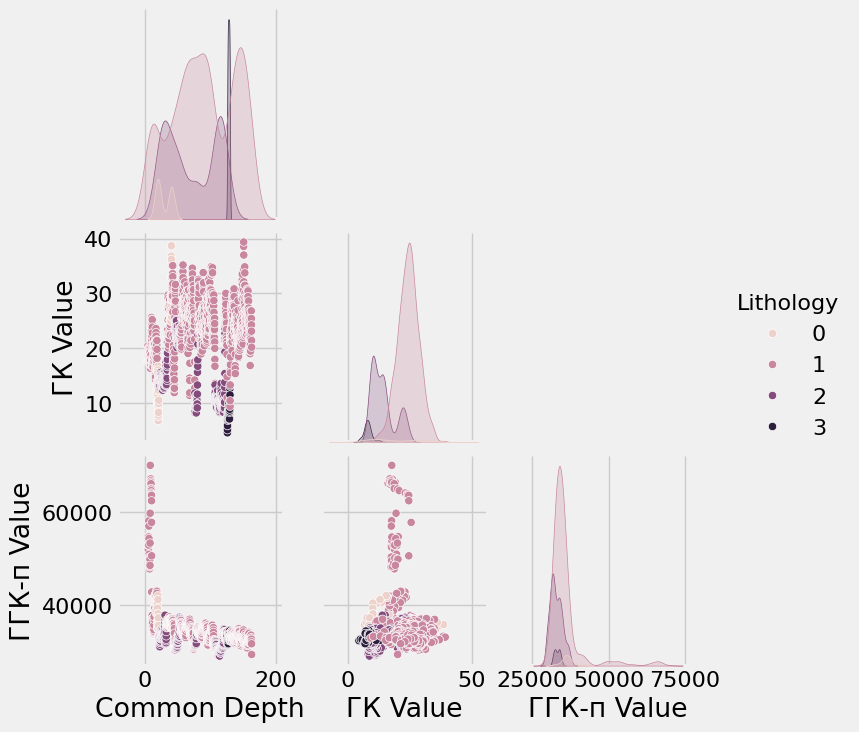

In [ ]:
sns.pairplot(data=X,hue='Lithology', corner=True)

In [ ]:
X.columns

Index(['Common Depth', 'Lithology', 'ГК Value', 'ГГК-п Value'], dtype='object')

In [ ]:
# Normalization of data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
columns_name = X.select_dtypes(include='float64')
X_numerical = X[['Common Depth', 'ГК Value', 'ГГК-п Value']]
X[list(columns_name)] = scaler.fit_transform(X_numerical[list(columns_name)])

In [ ]:
X

Common Depth  Lithology  ГК Value  ГГК-п Value
0         0.000000          1  0.455067     0.625992
1         0.000632          1  0.426069     0.612043
2         0.001264          1  0.402814     0.583163
3         0.001896          1  0.371806     0.575554
4         0.002528          1  0.376974     0.570973
...            ...        ...       ...          ...
1578      0.997472          1  0.598909     0.089340
1579      0.998104          1  0.565891     0.088481
1580      0.998736          1  0.532587     0.075104
1581      0.999368          1  0.483778     0.064550
1582      1.000000          1  0.448464     0.008345

[1583 rows x 4 columns]

In [ ]:
y_pred_new = best_extra_trees.predict(X)

In [ ]:
data_to_use = new_merged_data[['ГК, мкР/час',	'Глубина (ГК),м',	'ГГК-п имп/мин_x']]

In [ ]:
data_to_use.columns

Index(['ГК, мкР/час', 'Глубина (ГК),м', 'ГГК-п имп/мин_x'], dtype='object')

In [ ]:
path_to_ser = Path('/content/Rosatom/Data/Rosatom.xlsx')
data = pd.read_excel(path_to_ser, skiprows=0)

In [ ]:
y = data['TC, Вт/(мК)']
yy = data["Depth (TC), m"]

In [ ]:
df_new = pd.DataFrame()
n_average = 1000
df_new['TC avg'] = data['TC, Вт/(мК)'].rolling(window=n_average).mean()
df_new['Depth TC avg'] = data["Depth (TC), m"].rolling(window=n_average).mean()

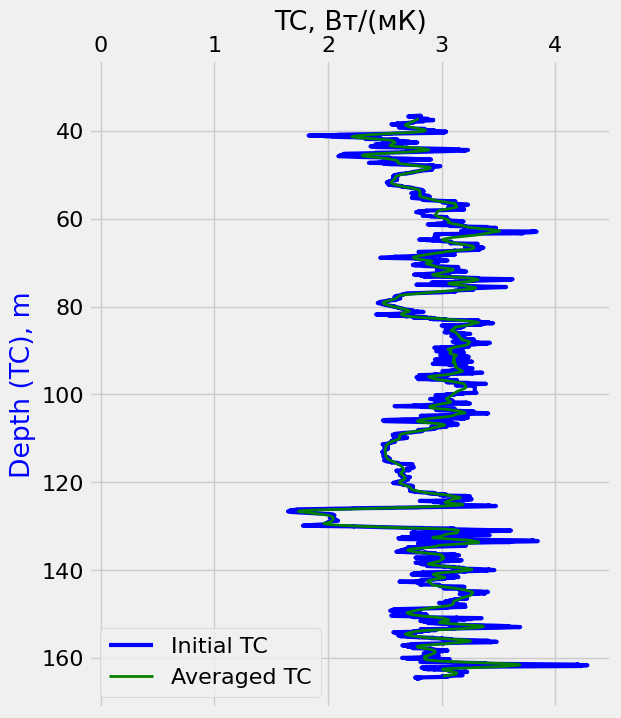

In [ ]:
fig, ax1 = plt.subplots(figsize=(6, 8))

data = merged_data

# Data for the first plot
x1, y1 = y, yy
ax1.plot(x1, y1, 'b-', label='Initial TC', lw=3)

x1, y1 = df_new['TC avg'], df_new['Depth TC avg']
ax1.plot(x1, y1, 'g-', label='Averaged TC', lw=2)
ax1.set_ylabel('Depth (TC), m', color='b')

ax1.invert_yaxis()  # Invert the y-axis for the first plot
ax1.xaxis.tick_top()  # Move the x-axis to the top
ax1.xaxis.set_label_position('top')  # Label for the x-axis on top
ax1.set_xlabel('TC, Вт/(мК)')
ax1.legend()

plt.show()

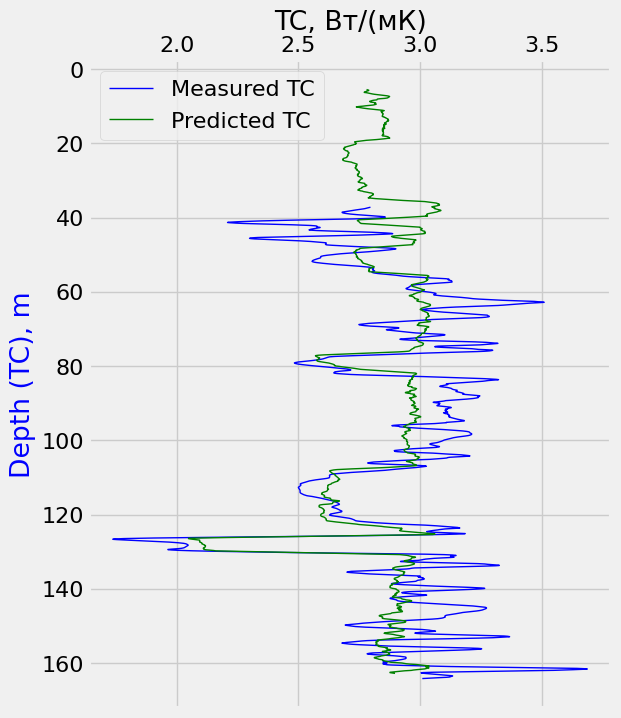

In [ ]:
fig, ax1 = plt.subplots(figsize=(6, 8))

data = merged_data

# Data for the first plot
x1, y1 = y, yy
x1, y1 = df_new['TC avg'], df_new['Depth TC avg']
ax1.plot(x1, y1, 'b-', label='Measured TC', lw=1)

x2 = pd.DataFrame(y_pred_new).rolling(window=10).mean()
y2 = depth_tc["Common Depth"].rolling(window=10).mean()

# x1, y1 = y_pred_new , depth_tc["Common Depth"]
ax1.plot(x2, y2, 'g-', label='Predicted TC', lw=1)
ax1.set_ylabel('Depth (TC), m', color='b')

ax1.invert_yaxis()  # Invert the y-axis for the first plot
ax1.xaxis.tick_top()  # Move the x-axis to the top
ax1.xaxis.set_label_position('top')  # Label for the x-axis on top
ax1.set_xlabel('TC, Вт/(мК)')
ax1.legend()

plt.show()

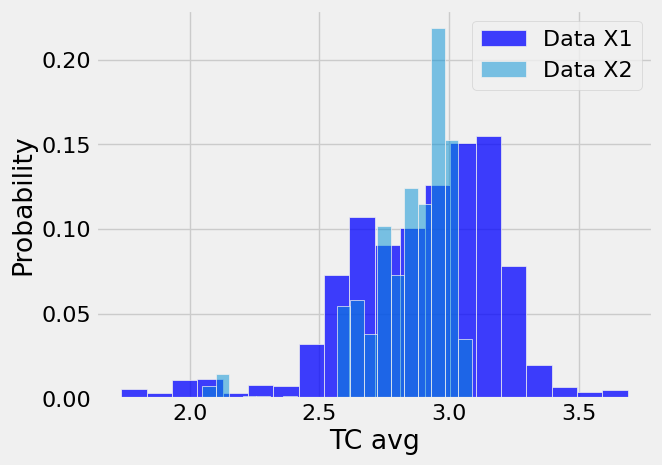

In [ ]:
# Create a figure and a single axes object
fig, ax = plt.subplots()

# Plot both histograms on the same Axes
sns.histplot(data=x1, stat="probability", bins=20, ax=ax, color="blue", label="Data X1")
sns.histplot(data=x2, stat="probability", bins=20, ax=ax, color="red", label="Data X2")

# Add legend to distinguish the histograms
ax.legend()

# Show the plot
plt.show()